In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
%cd /gdrive/My Drive/statistics/stats

/gdrive/My Drive/statistics/stats


<h2><center></center></h2>
<h1><center><font color = "Green" size=10 >Capstone Project -1</center></font></h1>
<h2><center>Project Name: Flight Satisfaction Prediction: Enhancing Passenger Experiences</center></h2>
<center> Classification </center>




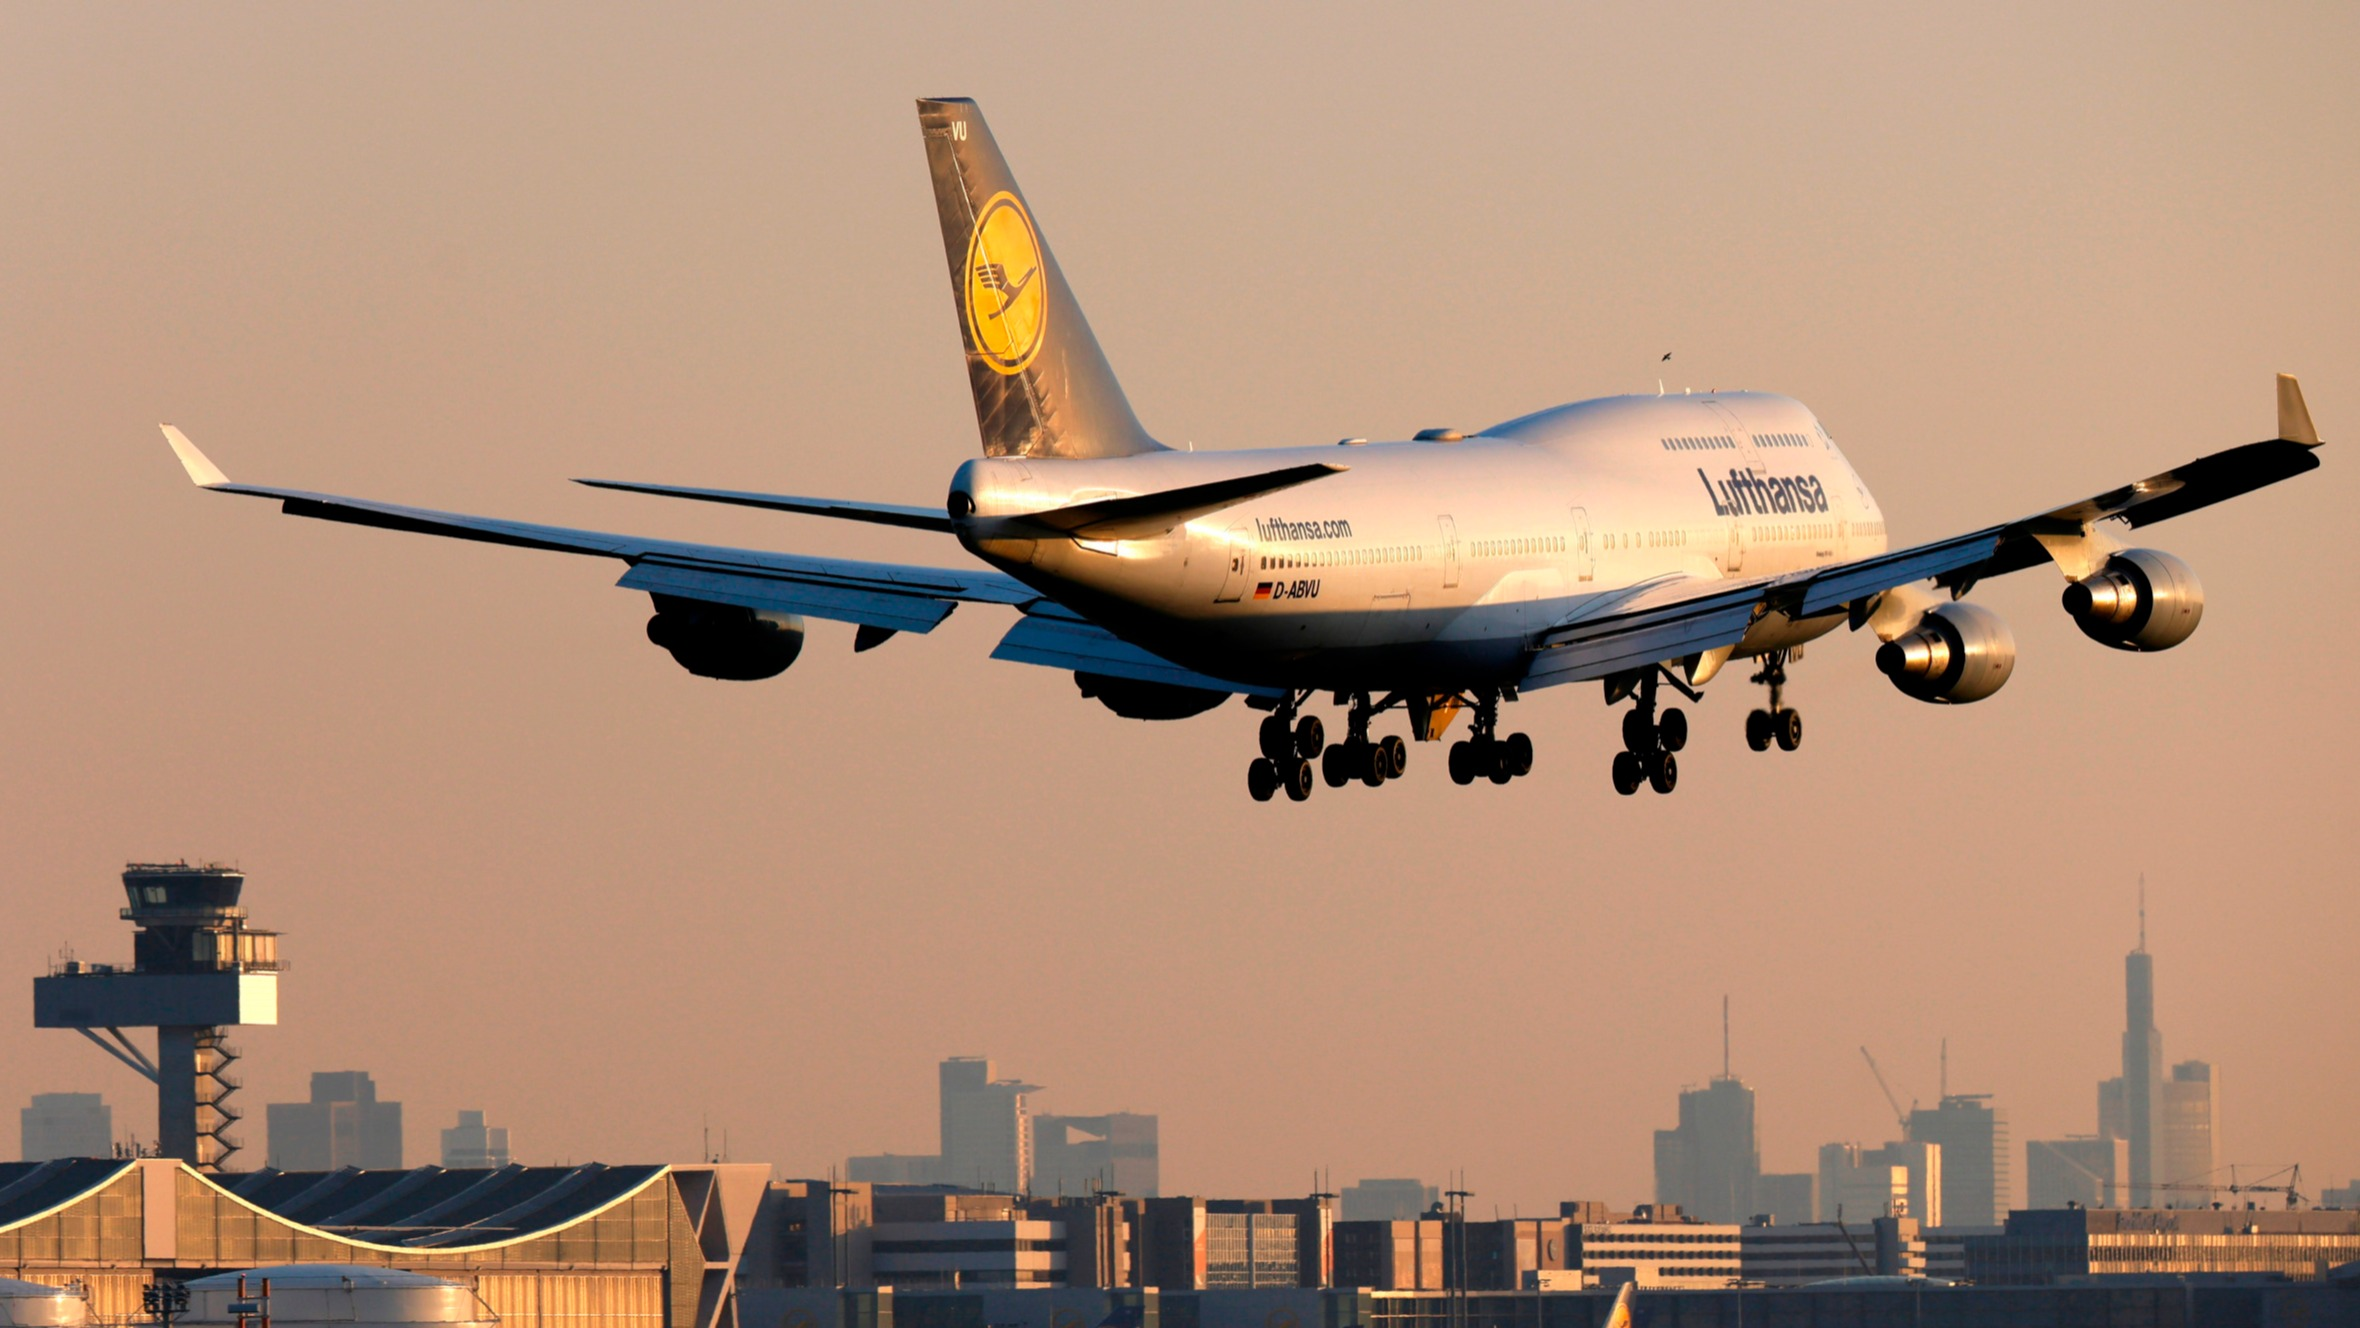

# <font color = "blue" size = 6> **Background** </font>

 * The aviation industry is highly competitive and rapidly evolving, driven by factors like globalization, rising incomes, and technological advancements. Airlines face the challenge of managing growing passenger numbers while maintaining high service standards.

* Customer satisfaction is crucial for airlines to stand out in the market. Satisfied customers are more likely to stay loyal and recommend the airline to others. Understanding what drives passenger satisfaction is essential for airlines to improve services and retain customers.

* Technology plays a key role in enhancing customer experiences, from booking to post-flight services. Airlines collect vast amounts of data on customer demographics, travel patterns, and service ratings to gain insights into passenger preferences and behaviors.

Predictive modeling using machine learning helps airlines anticipate customer satisfaction levels by analyzing historical data. This allows airlines to identify areas for improvement and tailor services to meet changing customer expectations.

# <font color = "brown" size = 7> **Problem Statement** </font>
In the aviation industry, ensuring customer satisfaction is paramount for maintaining competitiveness and fostering brand loyalty. Understanding passenger sentiments and factors influencing their satisfaction levels can significantly impact operational strategies and customer experience enhancements.

Given a dataset containing various attributes related to passengers' flight experiences, including demographic information, travel preferences, service ratings, and flight details, the objective is to predict whether a customer is satisfied or not based on their journey.


<font color = "brown" size = 5> **Data Dictionary** </font>


**Gender**: Gender of the passengers (Female, Male)

**Customer Type**: The customer type (Loyal customer, disloyal customer)

**Age**: The actual age of the passengers

**Type of Travel**: Purpose of the flight of the passengers (Personal Travel, Business Travel)

**Class**: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

**Flight distance**: The flight distance of this journey

**Inflight wifi service**: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

**Departure/Arrival time convenient**: Satisfaction level of Departure/Arrival time convenient

**Ease of Online booking**: Satisfaction level of online booking

**Gate location**: Satisfaction level of Gate location

**Food and drink**: Satisfaction level of Food and drink

**Online boarding**: Satisfaction level of online boarding

**Seat comfort**: Satisfaction level of Seat comfort

**Inflight entertainment**: Satisfaction level of inflight entertainment

**On-board service**: Satisfaction level of On-board service

**Leg room service**: Satisfaction level of Leg room service

**Baggage handling**: Satisfaction level of baggage handling

**Check-in service**: Satisfaction level of Check-in service

**Inflight service**: Satisfaction level of inflight service

**Cleanliness**: Satisfaction level of Cleanliness

**Departure Delay in Minutes**: Minutes delayed when departure

**Arrival Delay in Minutes**: Minutes delayed when Arrival

**Satisfaction**: Airline satisfaction level(Satisfaction and dissatisfaction)

In [89]:
# Importing necessary libraries.
import warnings
warnings.filterwarnings("ignore")  # Ignore warnings to keep the output clean.
# for numerical operations.
import numpy as np
# for data manipulation and analysis.
import pandas as pd
# for plotting data and visualizations.
import matplotlib.pyplot as plt
# for statistical data visualization.
import seaborn as sns

In [90]:
df = pd.read_csv("Airline Customer Satisfaction.csv")

In [91]:
df.head()

id  Gender      Customer Type  Age   Type of Travel     Class  \
0   70172    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1    5047    Male  disloyal Customer   25  Business travel  Business   
2  110028  Female     Loyal Customer   26  Business travel  Business   
3   24026  Female     Loyal Customer   25  Business travel  Business   
4  119299    Male     Loyal Customer   61  Business travel  Business   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              460                      3                                  4   
1              235                      3                                  2   
2             1142                      2                                  2   
3              562                      2                                  5   
4              214                      3                                  3   

   Ease of Online booking  ...  Inflight entertainment  On-board service  \
0                       3  ...                       5                 4   
1                       3  ...                       1                 1   
2                       2  ...                       5                 4   
3                       5  ...                       2                 2   
4                       3  ...                       3                 3   

   Leg room service  Baggage handling  Checkin service  Inflight service  \
0                 3                 4                4                 5   
1                 5                 3                1                 4   
2                 3                 4                4                 4   
3                 5                 3                1                 4   
4                 4                 4                3                 3   

   Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
0            5                          25                      18.0   
1            1                           1                       6.0   
2            5                           0                       0.0   
3            2                          11                       9.0   
4            3                           0                       0.0   

   satisfaction  
0  dissatisfied  
1  dissatisfied  
2     satisfied  
3  dissatisfied  
4     satisfied  

[5 rows x 24 columns]


<font color = "brown" size = 3> **Checking the numbers of rows and columns** </font>

In [6]:
df.shape

(129880, 24)


<font color = "brown" size = 3> **Lets have a look at column names** </font>

In [92]:
df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


<font color = "brown" size = 3>**Checking column type and missing values**</font>

In [93]:
#getting all the information of dataset using info command
#info command gives
  #1 No of rows
  #2 No of columns
  #3 No of float,int,object columns
  #4 Datatype of all the columns
  #5 Notnull values of all the columns
  #6 Memory used for storing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     1298


<font color = "brown" size = 3> **Column name has some spaces so lets fix them** </font>

In [94]:
df.columns= [col.replace(' ','_') for col in df.columns]


<font color = "brown" size = 3> **Lets check the null values** </font>

In [95]:
df.isnull().sum()

id                                     0
Gender                                 0
Customer_Type                          0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight_Distance                        0
Inflight_wifi_service                  0
Departure/Arrival_time_convenient      0
Ease_of_Online_booking                 0
Gate_location                          0
Food_and_drink                         0
Online_boarding                        0
Seat_comfort                           0
Inflight_entertainment                 0
On-board_service                       0
Leg_room_service                       0
Baggage_handling                       0
Checkin_service                        0
Inflight_service                       0
Cleanliness                            0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             393
satisfaction                           0
dtype: int64

# <font color = "Black" size = 3> **Observation :** </font>
Since the missing values are very few compared to the total entries, we will replace them with median.

In [96]:
percentage_null = df['Arrival_Delay_in_Minutes'].isnull().sum() / len(df['Arrival_Delay_in_Minutes']) * 100
print("Percentage of null values in Arrival_Delay_in_Minutes column:", percentage_null)


Percentage of null values in Arrival_Delay_in_Minutes column: 0.3025870033877425


There is 0.30 percentage Null value  in Arrival_Delay_in_Minutes  column so we will fill this  missing value by the median

In [11]:
df['Arrival_Delay_in_Minutes'] = df['Arrival_Delay_in_Minutes'].fillna(df['Arrival_Delay_in_Minutes'].median())

In [12]:
df['Arrival_Delay_in_Minutes'].isnull().sum()

0


<font color = "brown" size = 3> **Checking the unique values** </font>

In [13]:
df.nunique()

id                                   129880
Gender                                    2
Customer_Type                             2
Age                                      75
Type_of_Travel                            2
Class                                     3
Flight_Distance                        3821
Inflight_wifi_service                     6
Departure/Arrival_time_convenient         6
Ease_of_Online_booking                    6
Gate_location                             6
Food_and_drink                            6
Online_boarding                           6
Seat_comfort                              6
Inflight_entertainment                    6
On-board_service                          6
Leg_room_service                          6
Baggage_handling                          5
Checkin_service                           6
Inflight_service                          6
Cleanliness                               6
Departure_Delay_in_Minutes              466
Arrival_Delay_in_Minutes        



<font color = "brown" size = 3> **Statistical Summary** </font>

In [14]:
df.describe()   # Numerical column

id            Age  Flight_Distance  Inflight_wifi_service  \
count  129880.000000  129880.000000    129880.000000          129880.000000   
mean    64940.500000      39.427957      1190.316392               2.728696   
std     37493.270818      15.119360       997.452477               1.329340   
min         1.000000       7.000000        31.000000               0.000000   
25%     32470.750000      27.000000       414.000000               2.000000   
50%     64940.500000      40.000000       844.000000               3.000000   
75%     97410.250000      51.000000      1744.000000               4.000000   
max    129880.000000      85.000000      4983.000000               5.000000   

       Departure/Arrival_time_convenient  Ease_of_Online_booking  \
count                      129880.000000           129880.000000   
mean                            3.057599                2.756876   
std                             1.526741                1.401740   
min                             0.000000                0.000000   
25%                             2.000000                2.000000   
50%                             3.000000                3.000000   
75%                             4.000000                4.000000   
max                             5.000000                5.000000   

       Gate_location  Food_and_drink  Online_boarding   Seat_comfort  \
count  129880.000000   129880.000000    129880.000000  129880.000000   
mean        2.976925        3.204774         3.252633       3.441361   
std         1.278520        1.329933         1.350719       1.319289   
min         0.000000        0.000000         0.000000       0.000000   
25%         2.000000        2.000000         2.000000       2.000000   
50%         3.000000        3.000000         3.000000       4.000000   
75%         4.000000        4.000000         4.000000       5.000000   
max         5.000000        5.000000         5.000000       5.000000   

       Inflight_entertainment  On-board_service  Leg_room_service  \
count           129880.000000     129880.000000     129880.000000   
mean                 3.358077          3.383023          3.350878   
std                  1.334049          1.287099          1.316252   
min                  0.000000          0.000000          0.000000   
25%                  2.000000          2.000000          2.000000   
50%                  4.000000          4.000000          4.000000   
75%                  4.000000          4.000000          4.000000   
max                  5.000000          5.000000          5.000000   

       Baggage_handling  Checkin_service  Inflight_service    Cleanliness  \
count     129880.000000    129880.000000     129880.000000  129880.000000   
mean           3.632114         3.306267          3.642193       3.286326   
std            1.180025         1.266185          1.176669       1.313682   
min            1.000000         0.000000          0.000000       0.000000   
25%            3.000000         3.000000          3.000000       2.000000   
50%            4.000000         3.000000          4.000000       3.000000   
75%            5.000000         4.000000          5.000000       4.000000   
max            5.000000         5.000000          5.000000       5.000000   

       Departure_Delay_in_Minutes  Arrival_Delay_in_Minutes  
count               129880.000000             129880.000000  
mean                    14.713713                 15.045465  
std                     38.071126                 38.416353  
min                      0.000000                  0.000000  
25%                      0.000000                  0.000000  
50%                      0.000000                  0.000000  
75%                     12.000000                 13.000000  
max                   1592.000000               1584.000000

In [15]:
df.describe(include ='object')

Gender   Customer_Type   Type_of_Travel     Class  satisfaction
count   129880          129880           129880    129880        129880
unique       2               2                2         3             2
top     Female  Loyal Customer  Business travel  Business  dissatisfied
freq     65899          106100            89693     62160         73452



<font color = "brown" size = 5> **Data Distribution** </font>

In [16]:
numeric_df=df._get_numeric_data()

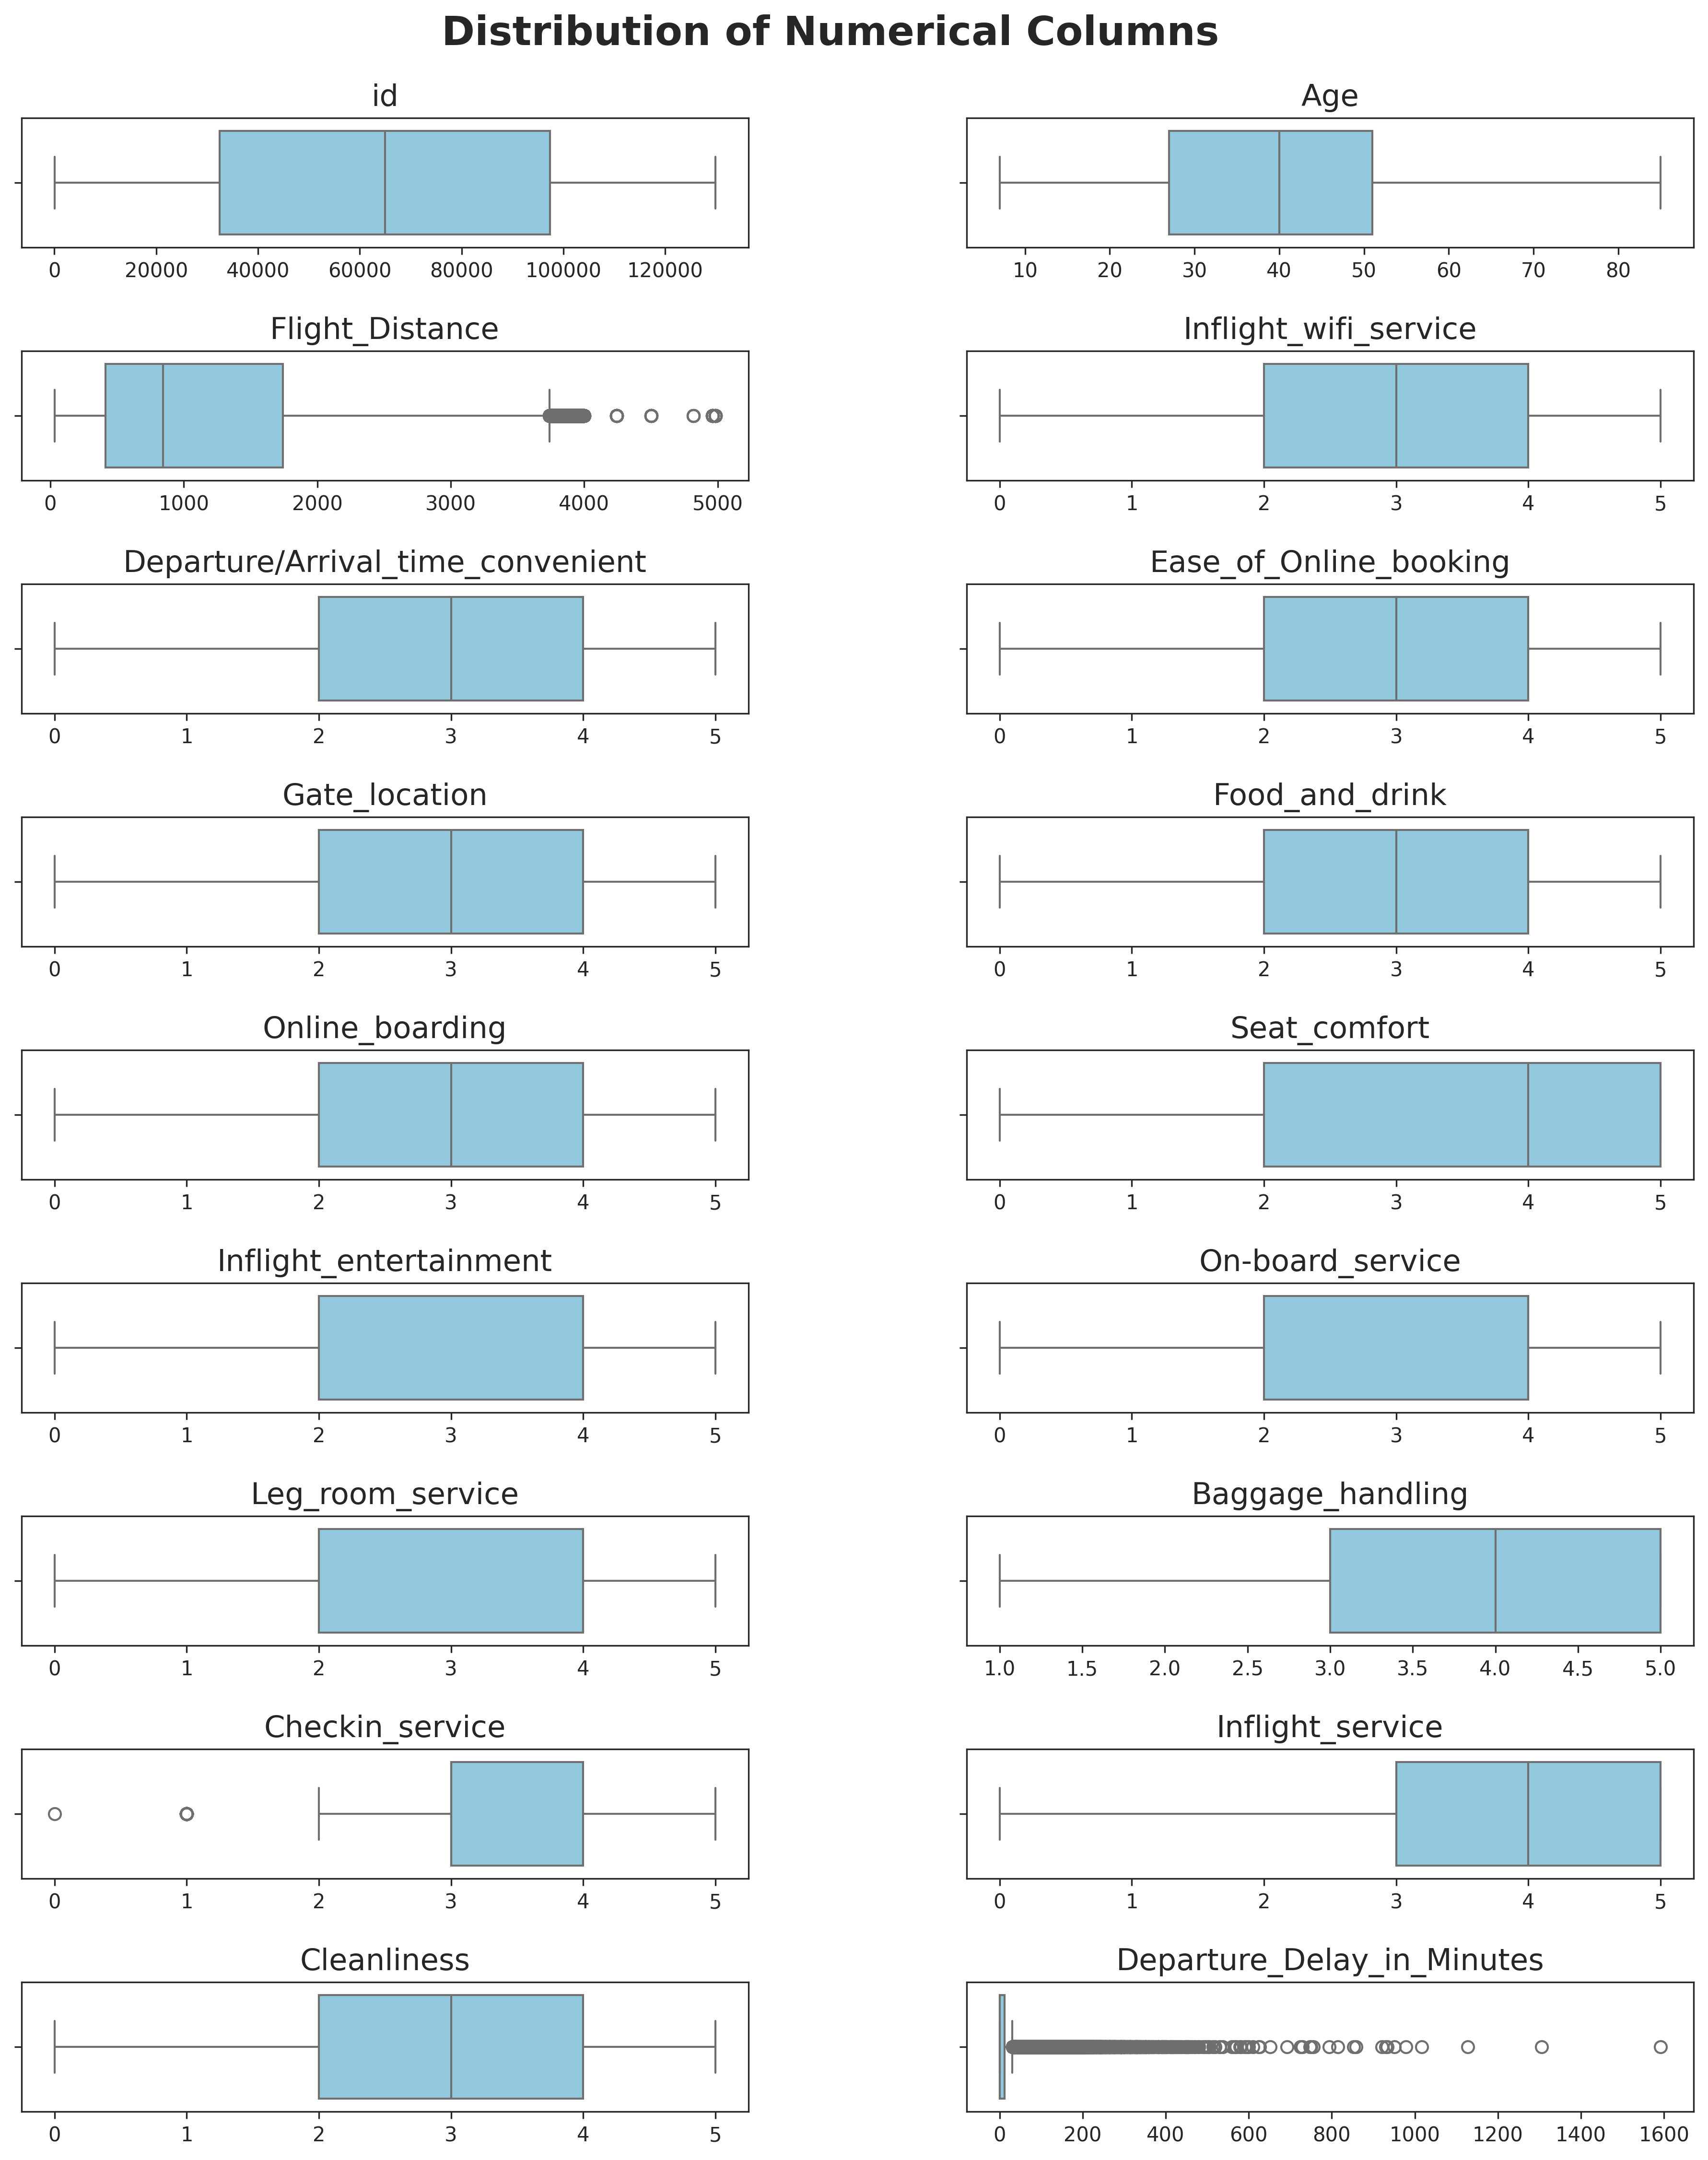

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `numeric_df` contains your numerical columns
# If not, replace `numeric_df` with your actual DataFrame containing numerical columns

# Set Seaborn style
sns.set_style('ticks')

# Create a new figure
fig, axes = plt.subplots(9, 2, figsize=(15, 18), dpi=300)

# Iterate through each numerical column
for ax, column_name in zip(axes.flatten(), numeric_df.columns):
    sns.boxplot(x=column_name, data=numeric_df, ax=ax, color='skyblue')
    ax.set_title(column_name, size=15)
    ax.set_xlabel('')

# Adjust subplot spacing
plt.subplots_adjust(hspace=0.8, wspace=0.3)

# Set title for the entire figure
fig.suptitle("Distribution of Numerical Columns", size=20, fontweight='bold', y=0.92)

# Show the plot
plt.show()


# <font color = "Black" size = 3> **Observation :** </font>

• There aren't any negative numbers.

• All the reviews are from 0 to 5 (which is not currect correct).because all most of the comapanis review range between 1 to 5 so we will fix it

• The age , departure delay,arrival delay and flight distance values are logical.


<font color = "Blue" size = 5> **Gender** </font>

In [18]:
df['Gender'].value_counts()

Female    65899
Male      63981
Name: Gender, dtype: int64

In [19]:
gender_percentage = df['Gender'].value_counts(normalize=True) * 100
print('Distribution of Genders:\n')
print(f'Females: {gender_percentage["Female"]:.2f}%')
print(f'Males: {gender_percentage["Male"]:.2f}%')

Distribution of Genders:

Females: 50.74%
Males: 49.26%


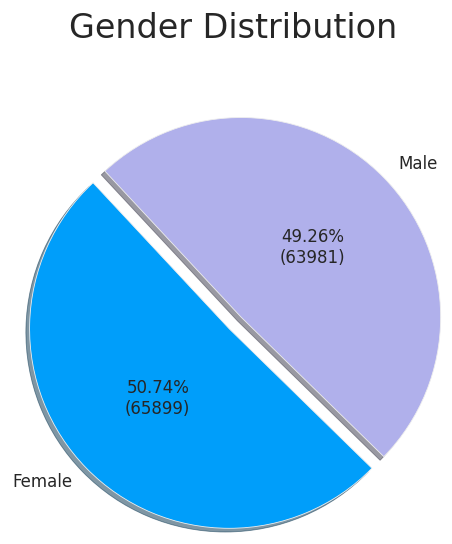

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 3), dpi=120)
plt.style.use('bmh')
plt.title('Gender Distribution', size=20, y=1.5, x=0.5)

explode = (0.05, 0.1)
gender_counts = df['Gender'].value_counts()

# Define a function to generate autopct
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct, v=val)
    return my_autopct

plt.pie(gender_counts, labels=gender_counts.index, shadow=True, colors=['#009EFA', '#B0B0EB'],
        autopct=make_autopct(gender_counts), pctdistance=0.5, radius=1.8, startangle=133, explode=explode)

plt.show()


# <font color = "Black" size = 3> **Observation :** </font>
 The number of females is slightly higher than the number of males.


<font color = "Blue" size = 5> **Age** </font>

<Axes: ylabel='Age'>

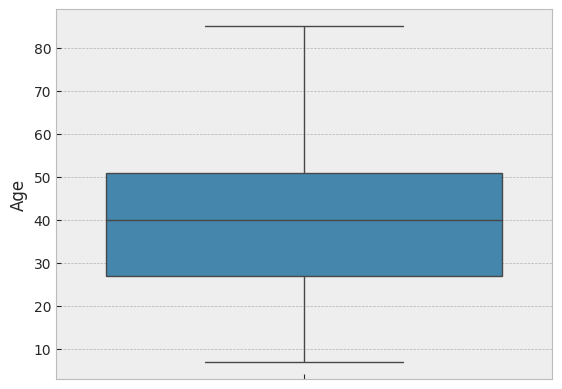

In [21]:
sns.boxplot(df['Age'])

# <font color = "Black" size = 3> **Observation :** </font>
We can see that there are no anomalies in the Ages column (No negative ages or big integers).

<Axes: xlabel='Age', ylabel='Class'>

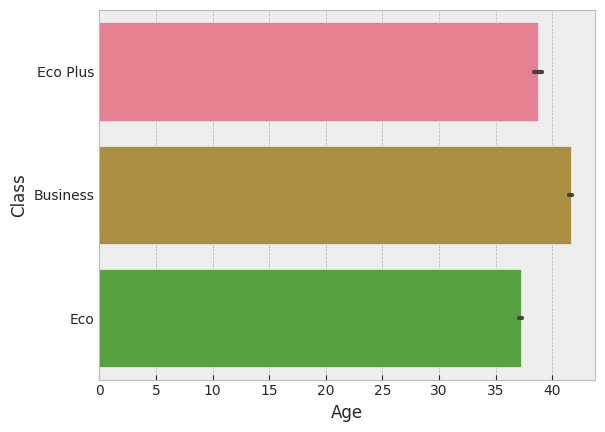

In [22]:
colors = sns.color_palette("husl")
sns.barplot(x='Age',y='Class',data=df,palette=colors)


<font color = "Blue" size = 5> **Customer Type** </font>

In [23]:
df['Customer_Type'].value_counts()

Loyal Customer       106100
disloyal Customer     23780
Name: Customer_Type, dtype: int64

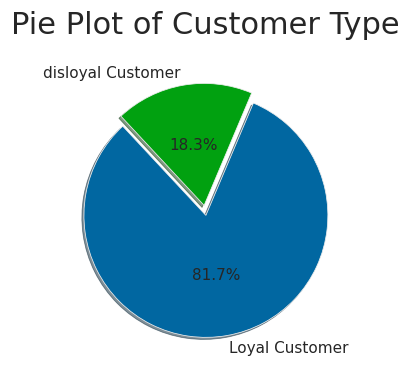

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 2), dpi=110)
plt.style.use('bmh')
plt.title('Pie Plot of Customer Type', size=20, y=1.5, x=0.5)

explode = (0.05, 0.1)
customer_type_counts = df['Customer_Type'].value_counts()

plt.pie(customer_type_counts, labels=customer_type_counts.index, shadow=True, colors=['#0167A1', '#01A110'],
        autopct='%1.1f%%', pctdistance=0.5, radius=1.8, startangle=133, explode=explode)

plt.show()


# <font color = "Black" size = 3> **Observation :** </font>

• We come to the conclusion that most of the airline customers are returning ones. Less than 20% are first time customers.

<font color = "Blue" size = 5> **Type of Travel** </font>

In [25]:
df['Type_of_Travel'].value_counts()

Business travel    89693
Personal Travel    40187
Name: Type_of_Travel, dtype: int64

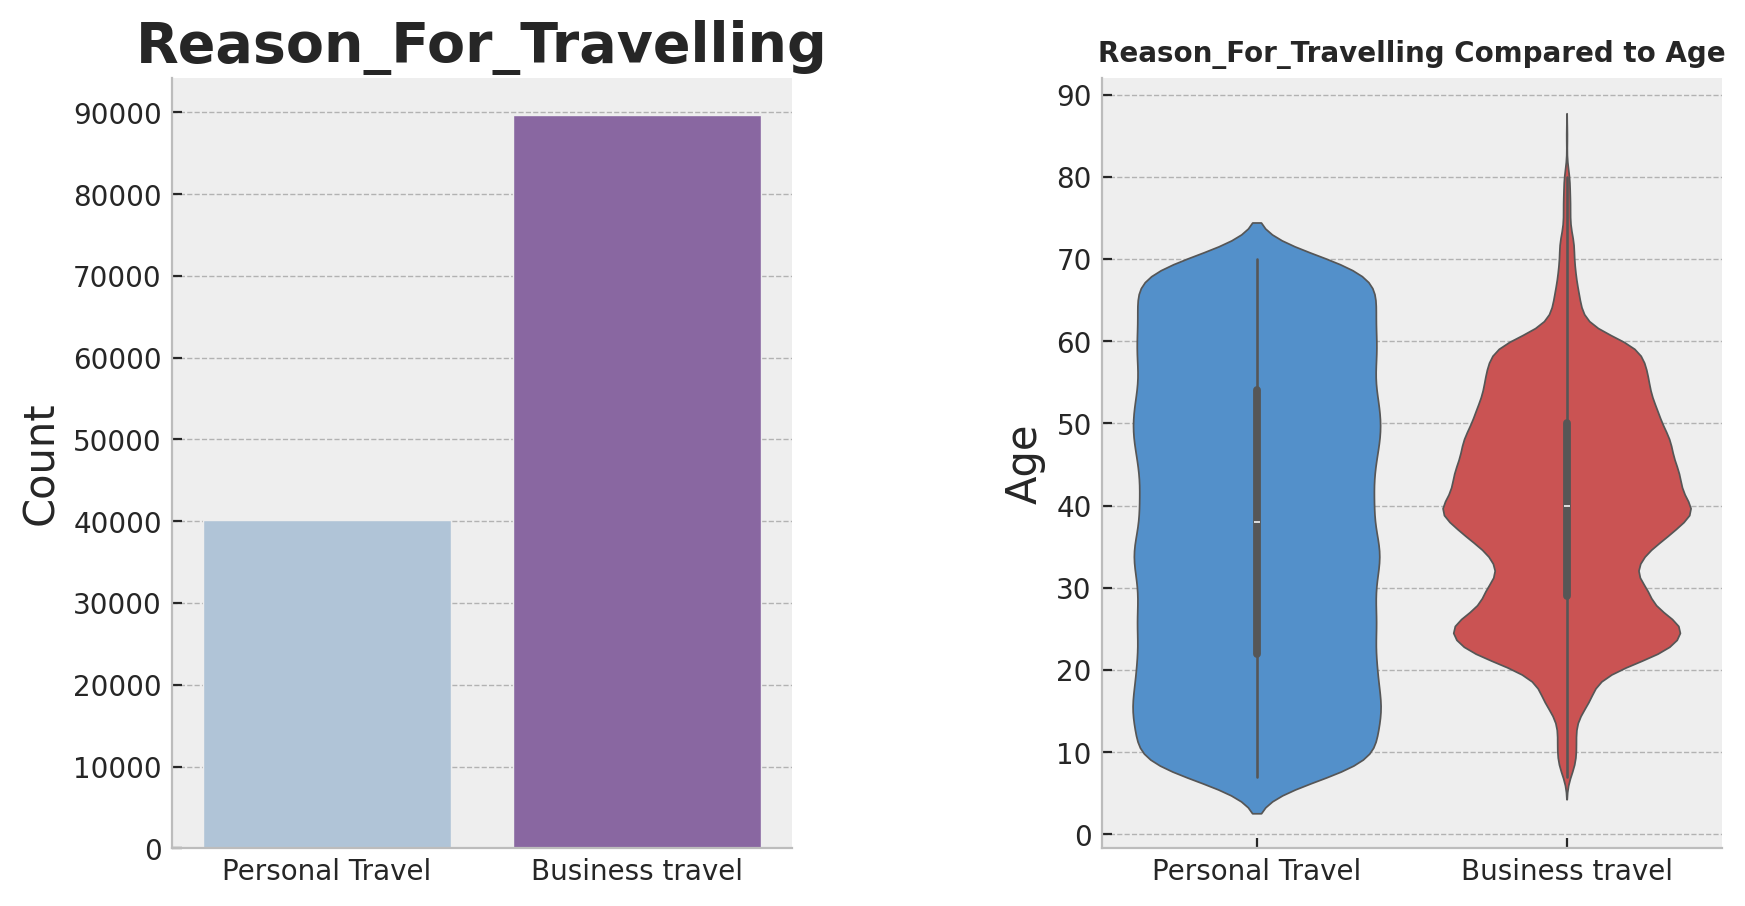

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5), dpi=200)

# First subplot
plt.subplot(1, 2, 1)
sns.countplot(x='Type_of_Travel', data=df, palette='BuPu')
plt.title('Reason_For_Travelling', size=20, fontweight='bold')
plt.xlabel('')
plt.ylabel('Count', size=15)
plt.yticks(np.arange(0, 100000, 10000))
sns.despine()

# Second subplot
plt.subplot(1, 2, 2)
sns.violinplot(x='Type_of_Travel', y='Age', data=df, palette=['#3F91DE', '#DE3F3F'])
plt.title('Reason_For_Travelling Compared to Age', size=10, fontweight='bold')
plt.ylabel('Age', size=15)
plt.yticks(np.arange(0, 100, 10))
plt.xlabel('')
sns.despine()

plt.subplots_adjust(hspace=0.6, wspace=0.5)

plt.show()


# <font color = "Black" size = 3> **Observation :** </font>

• Passengers flying for business purposes are almost triple than those flying for personal.

• Number of passengers flying for personal reasons is consinstent at any age.

• Most passengers flying for business are between 25-60.

<font color = "Blue" size = 5> **Class** </font>

<Axes: xlabel='Class', ylabel='count'>

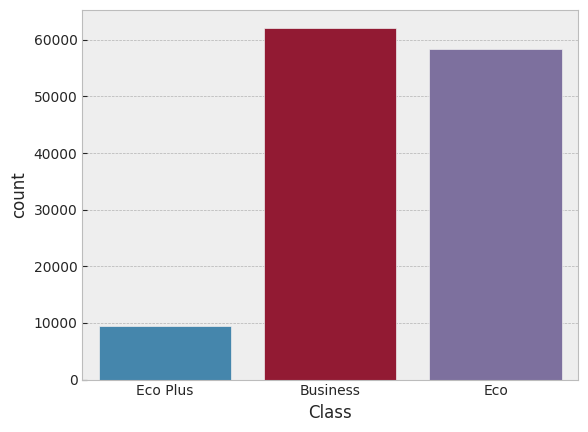

In [27]:
sns.countplot(x='Class',hue='Class',data=df)

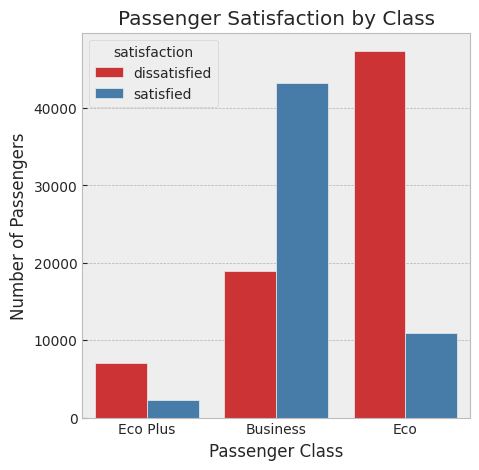

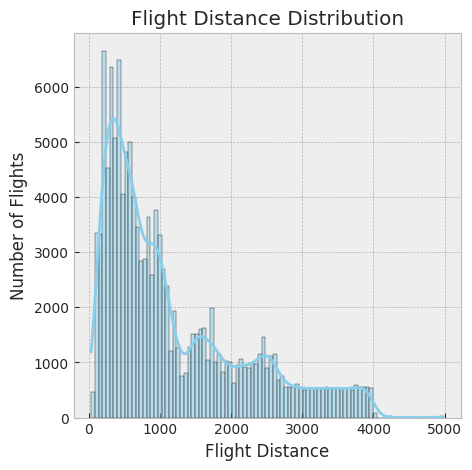

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the first graph (Passenger Satisfaction by Class)
plt.figure(figsize=(5, 5))
sns.countplot(x='Class',hue='satisfaction' ,data=df, palette='Set1')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.title('Passenger Satisfaction by Class')

# Create the second graph (Flight Distance Distribution)
plt.figure(figsize=(5, 5))
sns.histplot(df['Flight_Distance'], kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Flight Distance')
plt.ylabel('Number of Flights')
plt.title('Flight Distance Distribution')
plt.grid(True)  # Add grid lines for better visualization

plt.show()



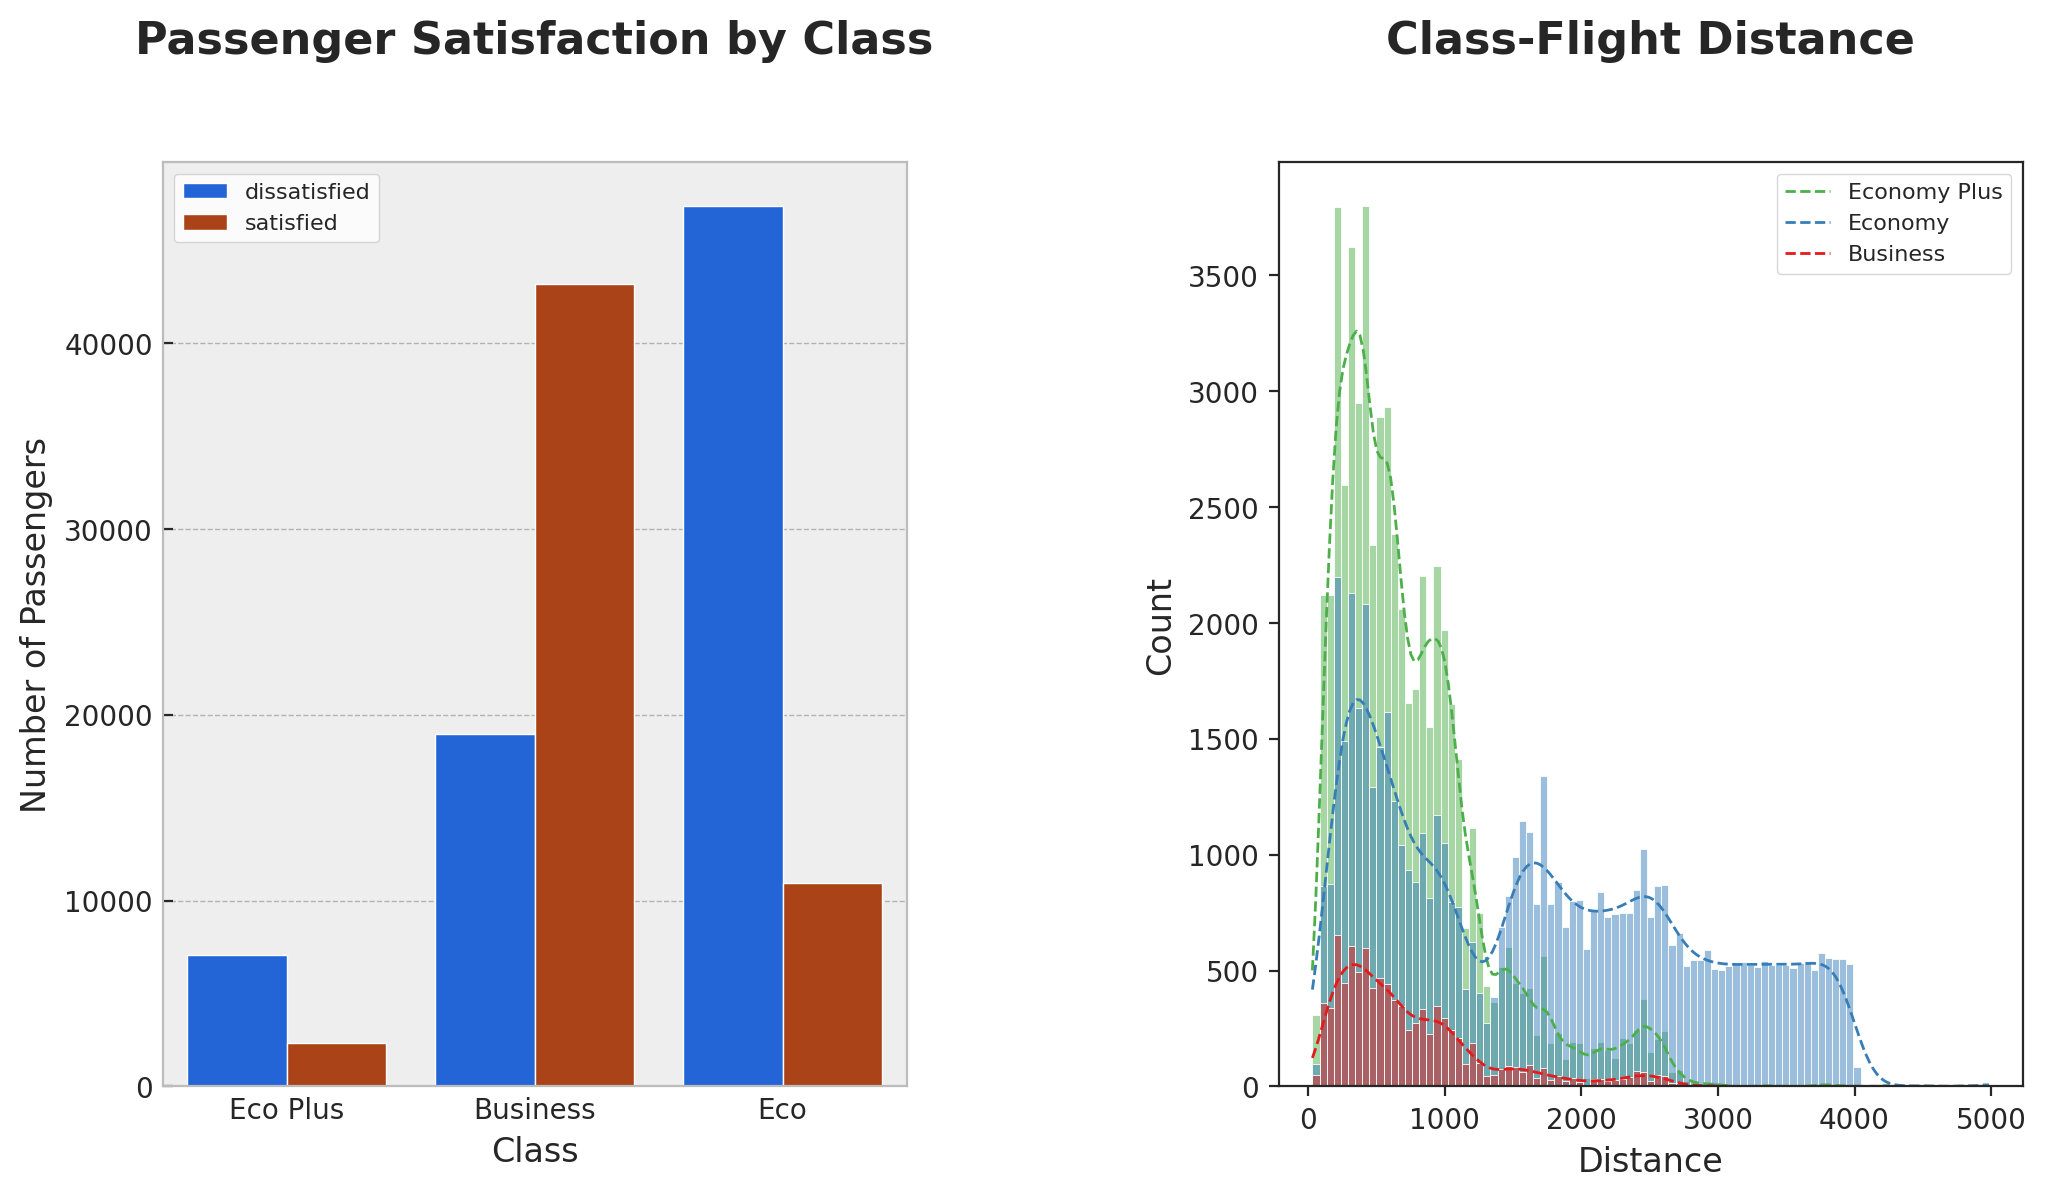

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size and dpi
plt.figure(figsize=(12, 6), dpi=200)

# First subplot: Passenger Satisfaction by Class
plt.subplot(1, 2, 1)
sns.set_style('ticks')
sns.countplot(x='Class', hue='satisfaction', data=df, palette=['#055df5', '#c23a00'])
plt.title('Passenger Satisfaction by Class', size=16, fontweight='bold', y=1.1)
plt.xlabel('Class', size=12)
plt.ylabel('Number of Passengers', size=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=8)

# Second subplot: Class-Flight Distance
plt.subplot(1, 2, 2)
sns.histplot(x='Flight_Distance', data=df, hue='Class', palette='Set1', kde=True, line_kws={'lw': 1, 'ls': '--'}, pmax=.1)
plt.title('Class-Flight Distance', size=16, fontweight='bold', y=1.1)
plt.xlabel('Distance', size=12)
plt.ylabel('Count', size=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(['Economy Plus', 'Economy', 'Business'], fontsize=8)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.6, wspace=0.5)

# Show the plot
plt.show()


# <font color = "Black" size = 3> **Observation :** </font>

• Very few people fly in the economy plus class. They usually prefer Economy or Business.

• More than 80% of passengers flying in economy are either Neutral or Dissatisfied. That shows us that it needs some impromevent.

• Passengers that fly for long distances almost always prefer business class. Probably because it is more comfortable.

<font color = "Blue" size = 5> **Delays** </font>

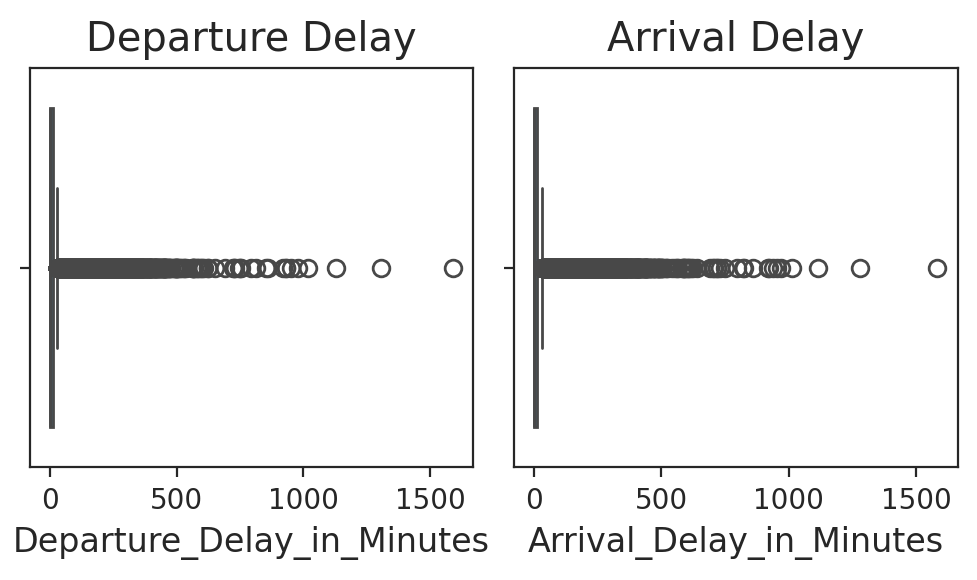

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and set of subplots
plt.figure(figsize=(5, 3), dpi=200)

# Create the boxplot for Departure Delay
plt.subplot(1, 2, 1)
sns.boxplot(x='Departure_Delay_in_Minutes', data=df)
plt.title('Departure Delay')

# Create the boxplot for Arrival Delay
plt.subplot(1, 2, 2)
sns.boxplot(x='Arrival_Delay_in_Minutes', data=df)
plt.title('Arrival Delay')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [31]:
departure_delay_pct = round((df['Departure_Delay_in_Minutes'] > 60).mean() * 100, 2)
arrival_delay_pct = round((df['Arrival_Delay_in_Minutes'] > 60).mean() * 100, 2)

print('Delay over an hour long:')
print(f'Departure delay: {departure_delay_pct} %')
print(f'Arrival delay: {arrival_delay_pct} %')


Delay over an hour long:
Departure delay: 6.91 %
Arrival delay: 7.0 %


# <font color = "Black" size = 3> **Observation :** </font>

• We can see that delays over an hour are at a small percentage, which is a good thing.

Note:
• The 7% of arrival delays are also directly connected to the departure delays which means the percentages are not that accurate.

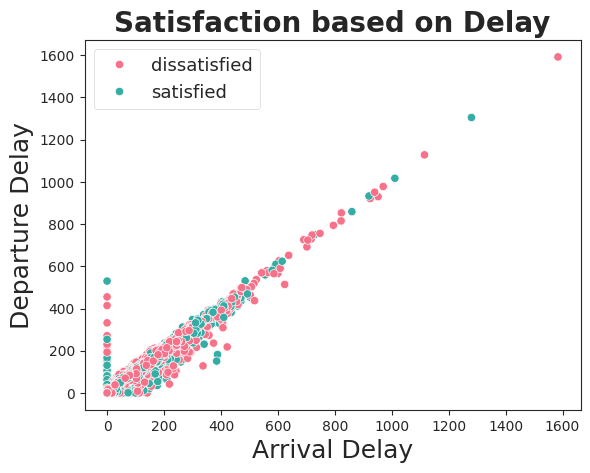

In [32]:
plt.title('Satisfaction based on Delay',size=20,fontweight='bold')

sns.scatterplot(y='Departure_Delay_in_Minutes',data=df,x='Arrival_Delay_in_Minutes',hue='satisfaction',palette='husl')

plt.xlabel('Arrival Delay',size=18)
plt.ylabel('Departure Delay',size=18)

plt.legend(fontsize='13')
plt.show()

# <font color = "Black" size = 3> **Observation :** </font>

• The longer the delay is more people are Dissatisfied (or Neutral) and less are Satisfied, which is expected.

<font color = "Brown" size = 3> **Correlation** </font>

<Axes: >

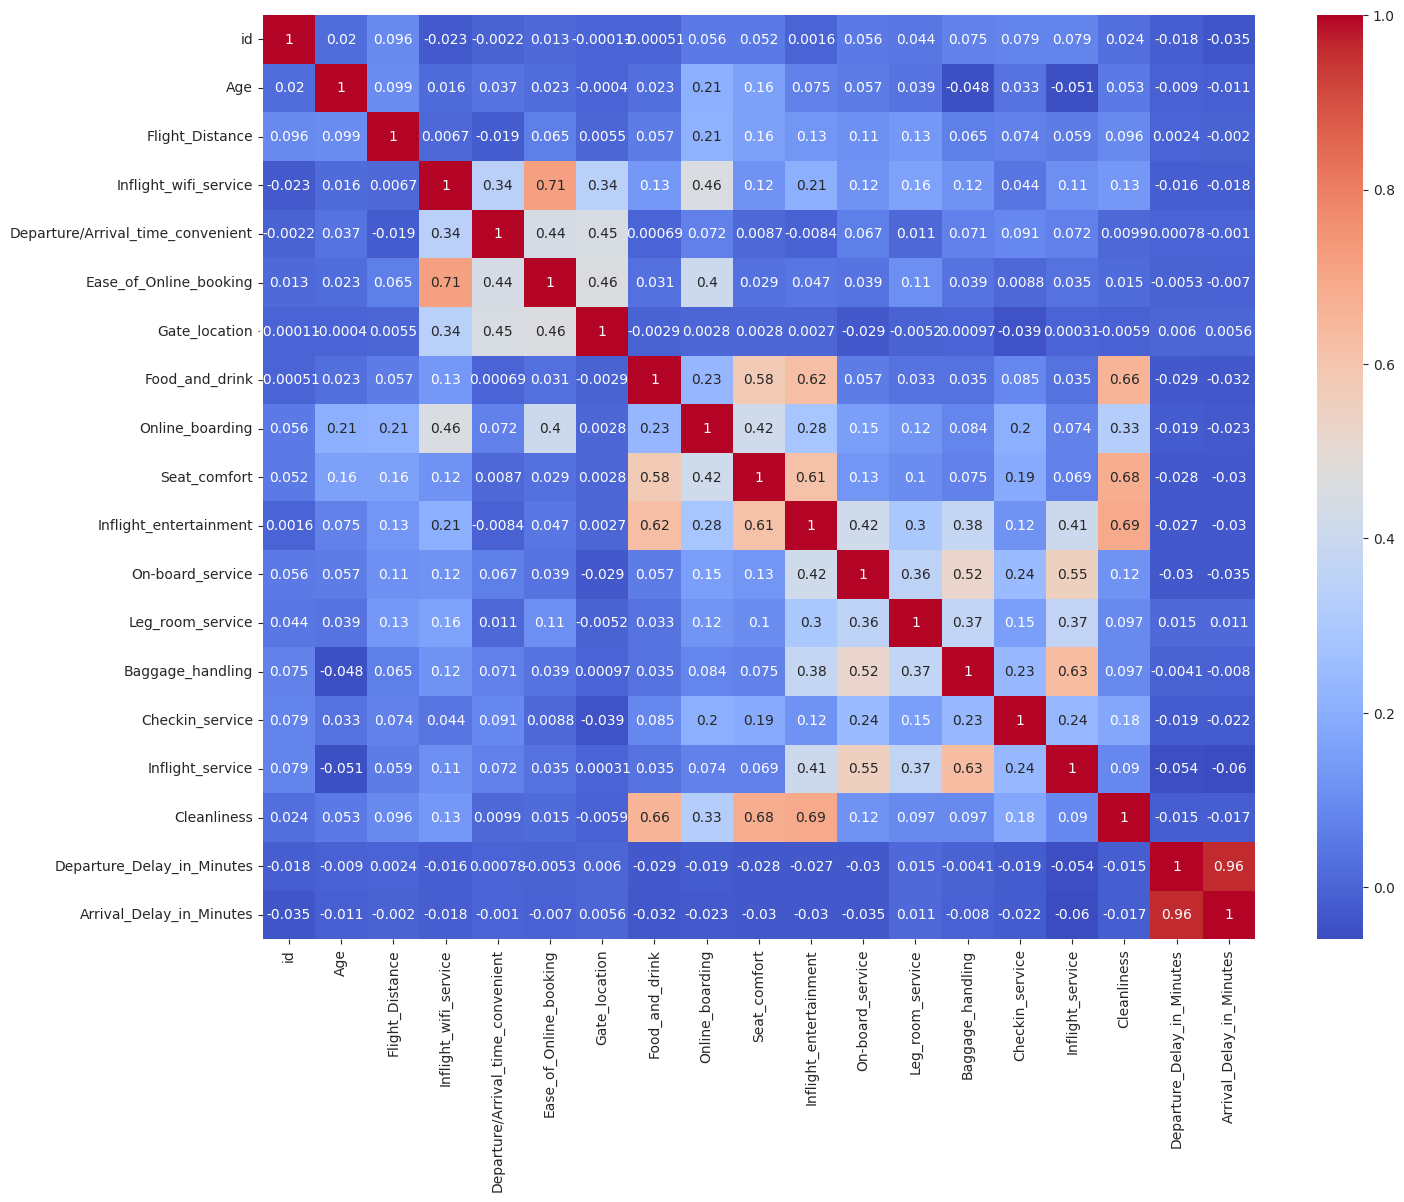

In [33]:
features = df.select_dtypes(exclude='object')
fig, ax = plt.subplots(figsize=(16,12))
sns.heatmap(df[list(features.columns)].corr(), cmap = 'coolwarm', annot = True, ax=ax)

# <font color = "Black" size = 3> **Observation :** </font>

It can be observed that two customer rating features (Departure/Arrival time convenient and Gate location), play negligible part in customer satisfaction

These two features can be removed as they will add complexity for the model without adding any information

The rest of the customer ratings play a part in the in the overall customer satisfaction

<font color = "Brown" size = 5> **Data Preprocessing** </font>

**Checking for Outliers**

In [34]:
import pandas as pd

def check_outliers(dataframe):
    # Determining the upper and lower quartiles
    Quart1 = dataframe.quantile(0.25)
    Quart3 = dataframe.quantile(0.75)

    # Determining the interquartile range
    IQR = Quart3 - Quart1

    # Determining the upper and lower outlier thresholds to remove the outliers
    upper_outlier_threshold = Quart3 + 1.5 * IQR
    lower_outlier_threshold = Quart1 - 1.5 * IQR

    # Finding the number of outliers in each column
    outliers = ((dataframe > upper_outlier_threshold) | (dataframe < lower_outlier_threshold)).sum()
    percent_outliers = round((outliers * 100 / len(dataframe)), 4)

    # Create a DataFrame to store the outlier information
    outlier_df = pd.DataFrame({'Number of Outliers': outliers,
                               'Percentage Outliers': percent_outliers})
    outlier_df.index.name = 'Feature'

    return outlier_df

# Example usage:
# outlier_info = check_outliers(your_dataframe)
# print(outlier_info)


In [35]:
check_outliers(df)

Number of Outliers  Percentage Outliers
Feature                                                                   
Age                                                 0               0.0000
Arrival_Delay_in_Minutes                        17492              13.4678
Baggage_handling                                    0               0.0000
Checkin_service                                 16109              12.4030
Class                                               0               0.0000
Cleanliness                                         0               0.0000
Customer_Type                                       0               0.0000
Departure/Arrival_time_convenient                   0               0.0000
Departure_Delay_in_Minutes                      18098              13.9344
Ease_of_Online_booking                              0               0.0000
Flight_Distance                                  2855               2.1982
Food_and_drink                                      0               0.0000
Gate_location                                       0               0.0000
Gender                                              0               0.0000
Inflight_entertainment                              0               0.0000
Inflight_service                                    0               0.0000
Inflight_wifi_service                               0               0.0000
Leg_room_service                                    0               0.0000
On-board_service                                    0               0.0000
Online_boarding                                     0               0.0000
Seat_comfort                                        0               0.0000
Type_of_Travel                                      0               0.0000
id                                                  0               0.0000
satisfaction                                        0               0.0000

# <font color = "Black" size = 3> **Observation :** </font>

It can be observed that four features have outliers associated with them namely, Arrival_Delay_in_Minutes, Checkin service, Departure Delay in Minutes, Flight_Distance
Yet it can also be observed that these outliers are entirely possible situations
There were very long flights
There were very long delays in departure and arrival, with a max of 1590 and 1572 minutes
Checkin services have 1 ratings which is also possible

Decisions:

It is advisable not to remove the outliers
There is a common belief in statistics that if outliers are not errors, they should not be removed as they might give important information about the data


<font color = "Brown" size = 5> **Removing Initial Insignificant Features** </font>

one feature have no significance in the dataset and are just identifiers of  ID of customers

These feature must first be removed  in the dataset for the model can create problems in predictions

In [36]:
df=df.drop("id",axis=1)

In [37]:
# replace it with 0 and 1
df['satisfaction'] = df['satisfaction'].apply(lambda x: 1 if x=='satisfied' else 0)

In [38]:
df['satisfaction'].value_counts()

0    73452
1    56428
Name: satisfaction, dtype: int64


<font color = "Brown" size = 5> **Filling Non Applicable Ratings** </font>

In [39]:
features = df.select_dtypes(exclude='object').drop(["satisfaction",
                                                    "Age",
                                                    "Departure_Delay_in_Minutes",
                                                    "Arrival_Delay_in_Minutes",
                                                    "Flight_Distance",
                                                    "Gate_location",
                                                    "Departure/Arrival_time_convenient"], axis=1)
for rating in features:
    df[rating] = df[rating].replace(0, df[rating].median())

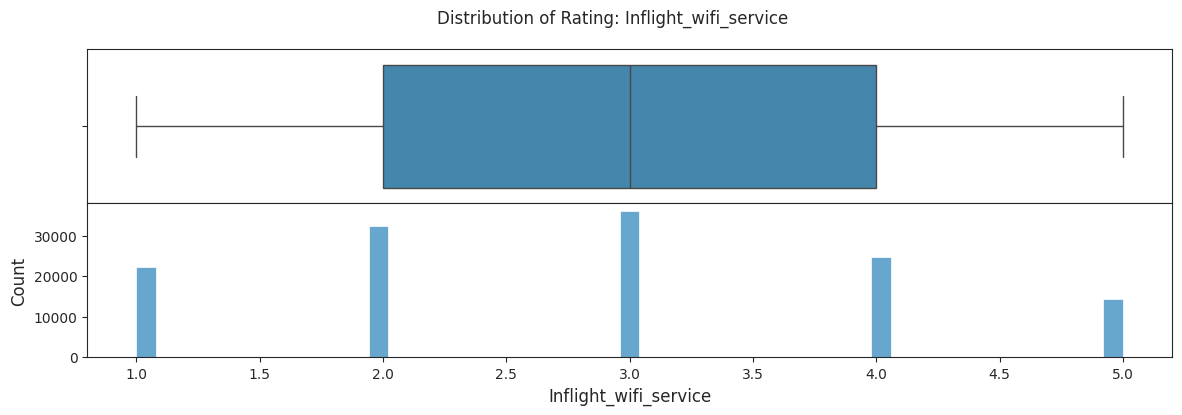

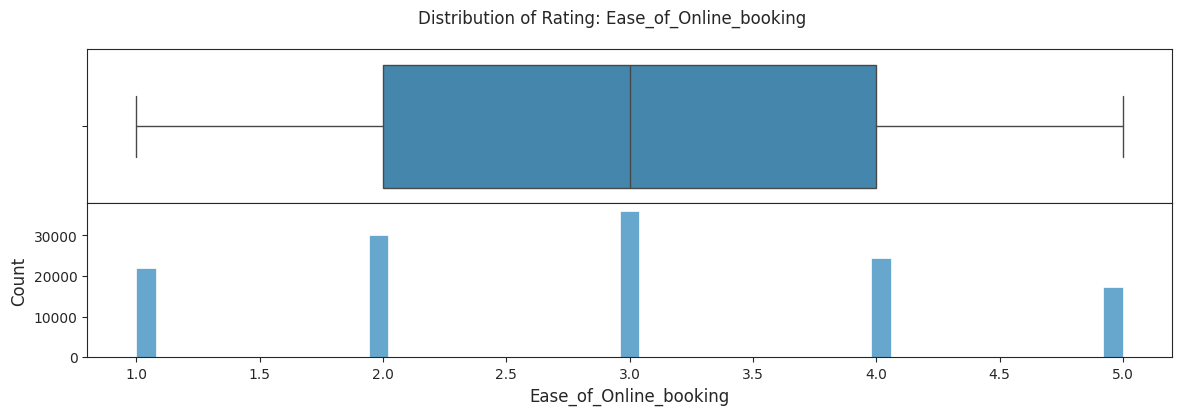

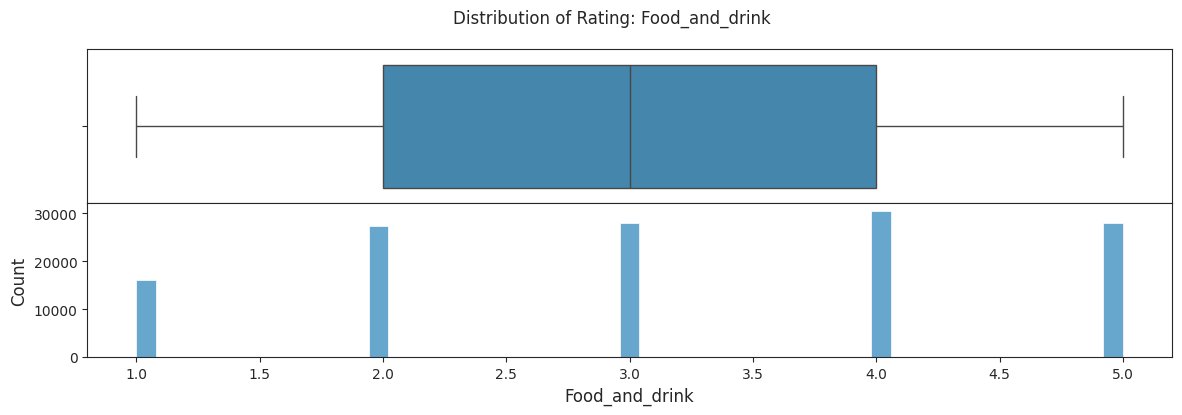

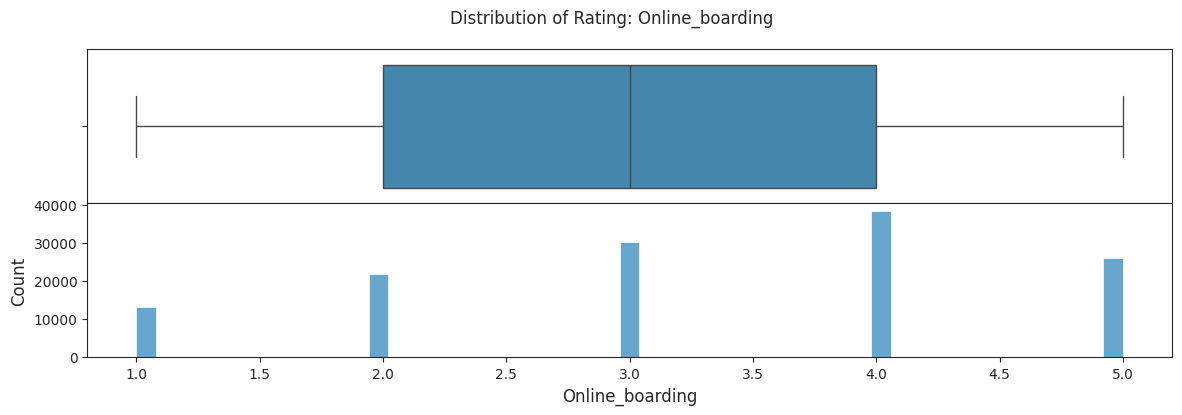

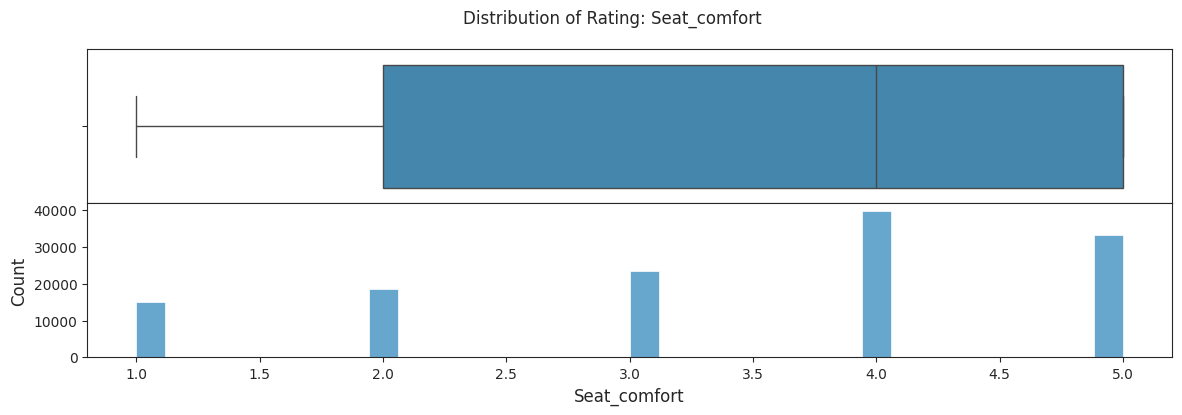

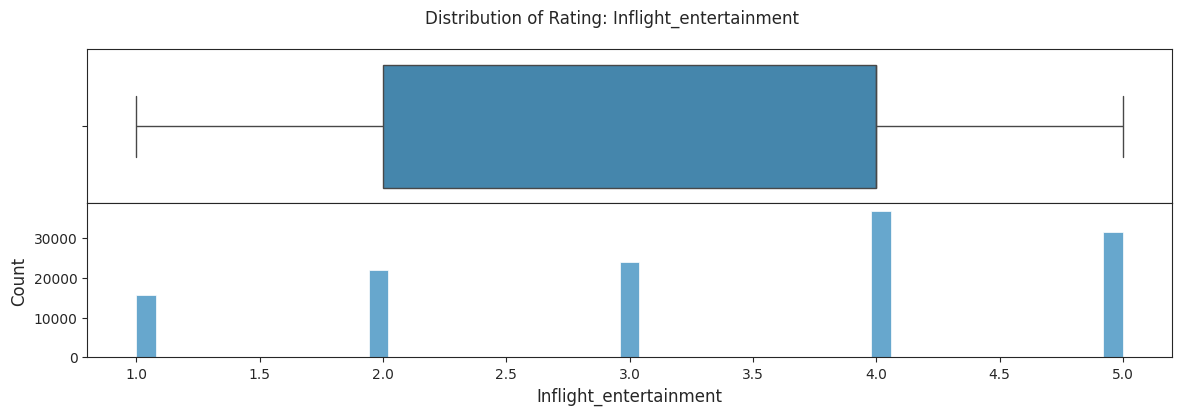

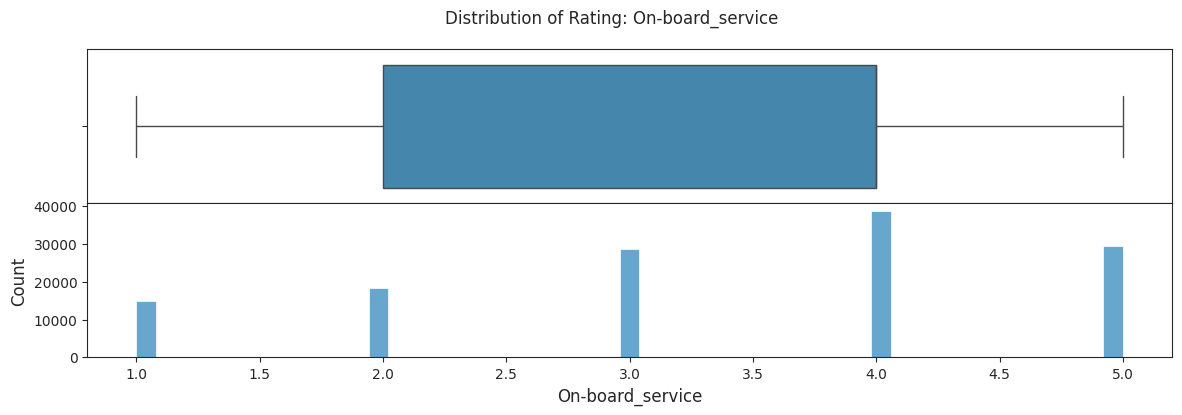

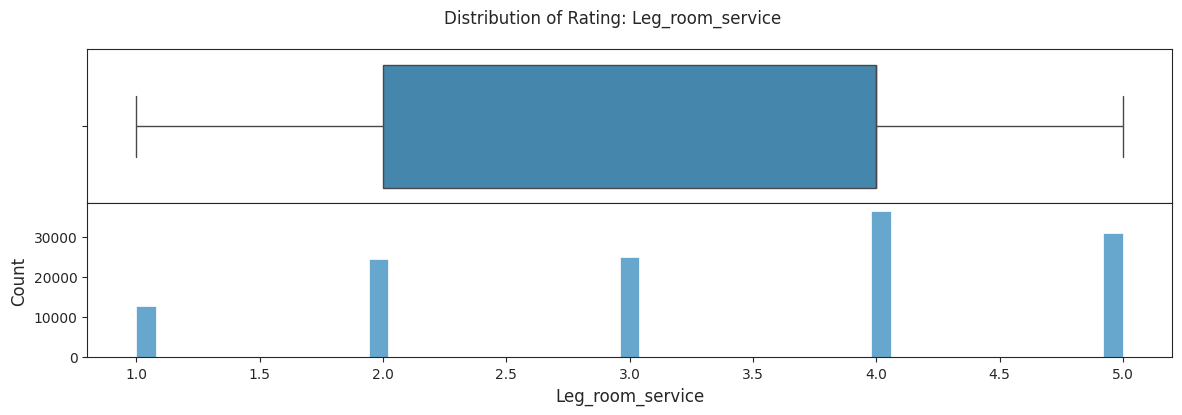

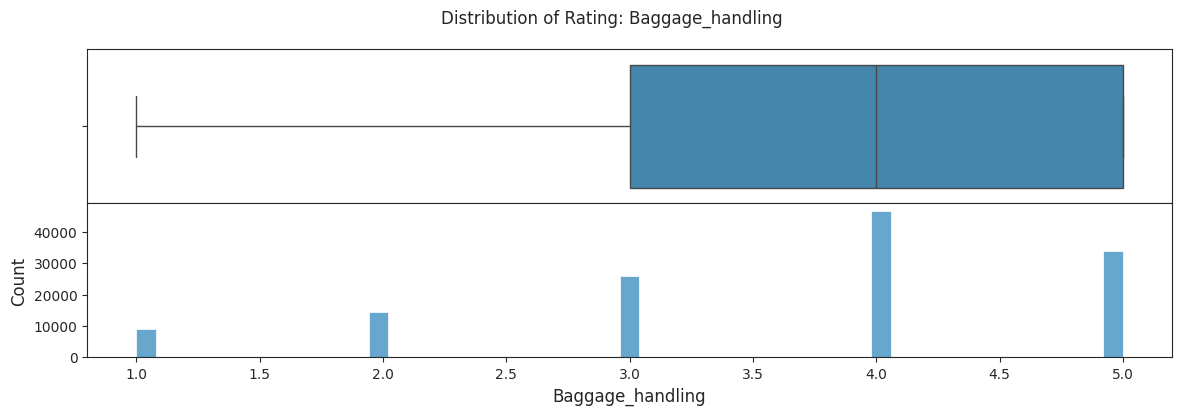

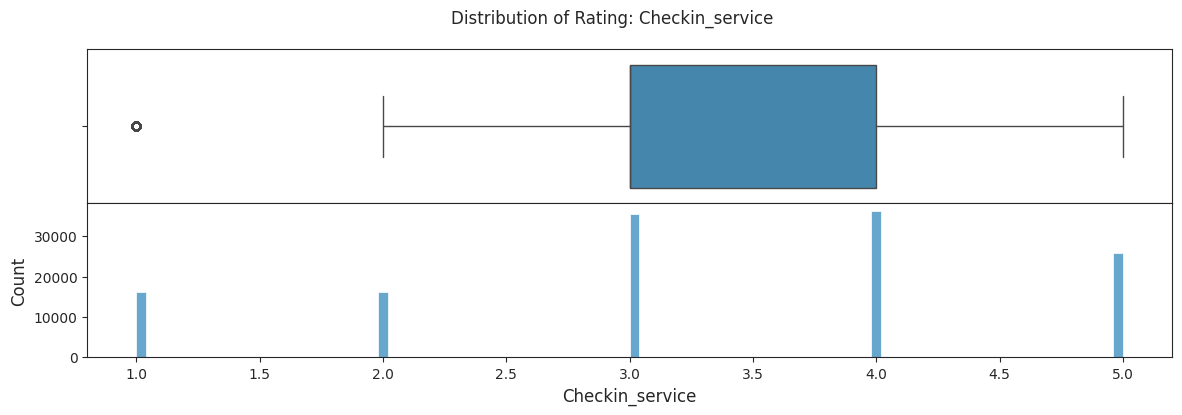

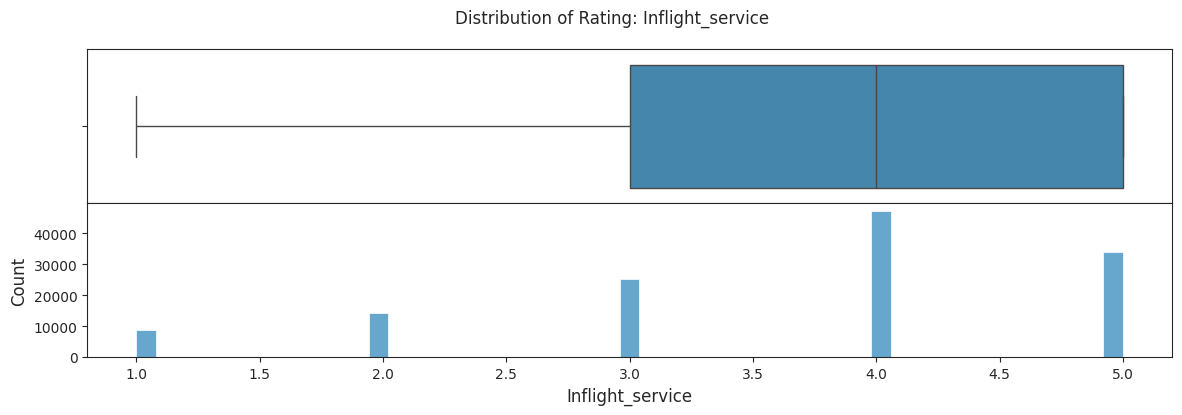

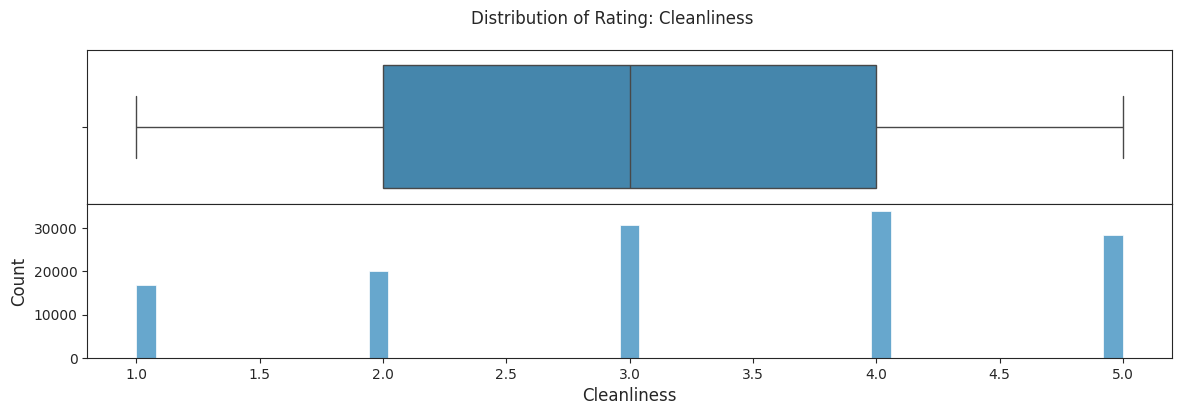

In [40]:
for col in features:
    fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(14, 4))
    plt.suptitle(f"Distribution of Rating: {col}")
    sns.boxplot(data=df, x=col, ax=ax1)
    sns.histplot(data=df, x=col, ax=ax2)
    plt.subplots_adjust(hspace=0)
    plt.show()

# <font color = "Black" size = 3> **Observation :** </font>

Now we can see that the ratings lie between 1-5 and still have a similar distribution

<font color = "Brown" size = 3> **Checking for Skewness in Features** </font>

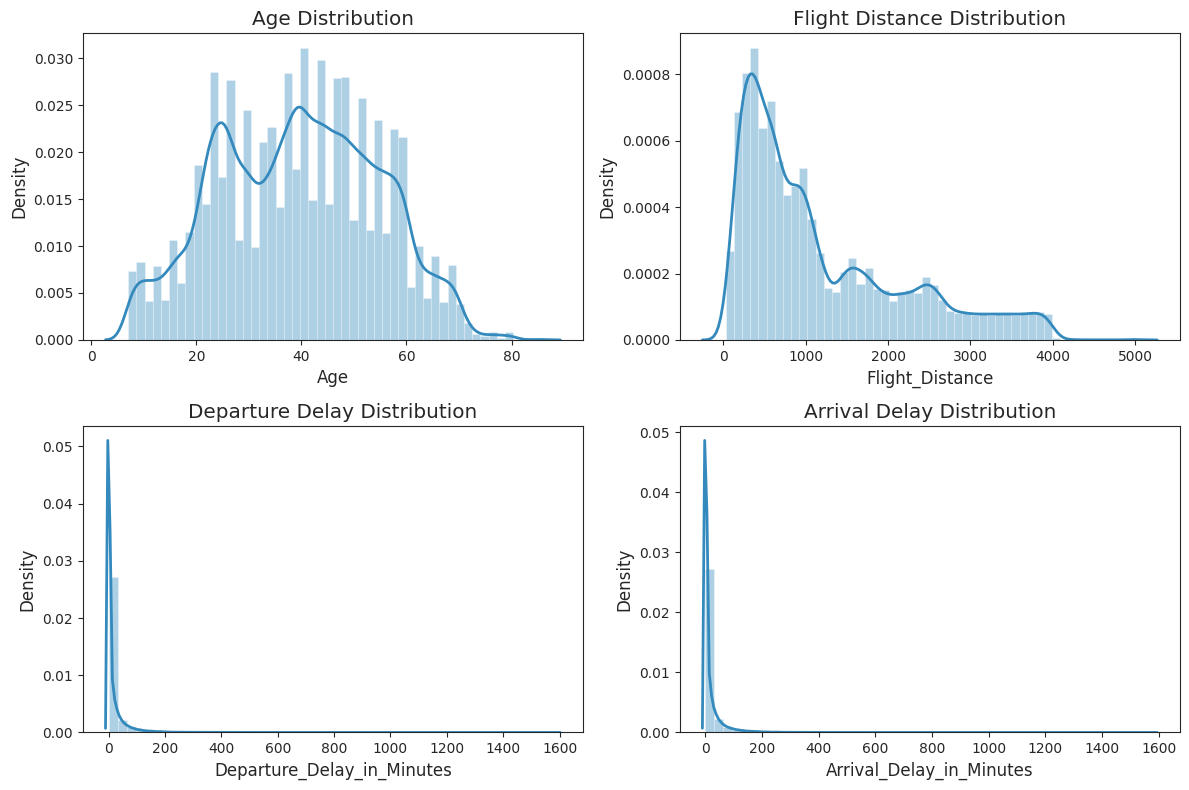

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot distribution for each column in a separate subplot
sns.distplot(df['Age'], ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.distplot(df['Flight_Distance'], ax=axes[0, 1])
axes[0, 1].set_title('Flight Distance Distribution')

sns.distplot(df['Departure_Delay_in_Minutes'], ax=axes[1, 0])
axes[1, 0].set_title('Departure Delay Distribution')

sns.distplot(df['Arrival_Delay_in_Minutes'], ax=axes[1, 1])
axes[1, 1].set_title('Arrival Delay Distribution')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


# <font color = "Black" size = 3> **Observation :** </font>

As we can see three of the four continous valued variables are highly skewed.

We need to remove the skewness and bring the distribution close to a Normal Distribution

<font color = "Brown" size = 3> **Correcting Skewness** </font>

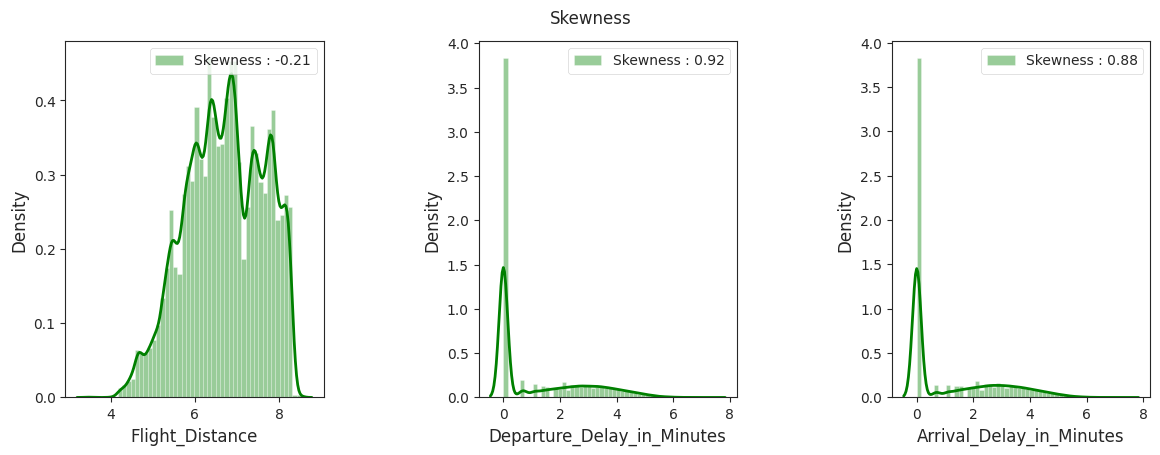

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and cont_features contains the continuous features
cont_features = ["Flight_Distance", "Departure_Delay_in_Minutes", "Arrival_Delay_in_Minutes"]

fig, axs = plt.subplots(ncols=3, figsize=(14, 4))
fig.suptitle("Skewness")
plt.subplots_adjust(top=0.90, bottom=0.01, hspace=0.3, wspace=0.6)

for i, feature in enumerate(cont_features):
    # Apply log transformation
    df[feature] = np.log1p(df[feature])

    # Plot the distribution after log transformation
    g = sns.distplot(df[feature], color="g", ax=axs[i], label="Skewness : %.2f" % df[feature].skew()).legend(loc="best")

plt.show()


<font color = "Brown" size = 3> **Removing Non-Essential Features** </font>

Decisions:

Three specific features play negligible part in determining customer satisfaction

These features are:  "Gate Location", "Departure/Arrival time convenient"

We will remove these features to simplify the model training

In [43]:
df = df.drop([ "Gate_location", "Departure/Arrival_time_convenient"], axis=1)

<font color = "Brown" size = 5> **One-hot Encoding Categorical Values** </font>


Decisions:

We will only one-hot encode categorical features which do not have an ordinal relationship
Features such as the customer ratings are ordinal relationships and thus does not need one-hot encoding

The features we will one-hot encode are:

* Customer Type

* Type of Travel

* Class

In [44]:
df = pd.get_dummies(df, columns = ['Customer_Type', 'Type_of_Travel', 'Class','Gender'], dtype=int)
df.describe(include="all")

Age  Flight_Distance  Inflight_wifi_service  \
count  129880.000000    129880.000000          129880.000000   
mean       39.427957         6.706443               2.819148   
std        15.119360         0.915621               1.239631   
min         7.000000         3.465736               1.000000   
25%        27.000000         6.028279               2.000000   
50%        40.000000         6.739337               3.000000   
75%        51.000000         7.464510               4.000000   
max        85.000000         8.513988               5.000000   

       Ease_of_Online_booking  Food_and_drink  Online_boarding   Seat_comfort  \
count            129880.00000   129880.000000    129880.000000  129880.000000   
mean                  2.88812        3.207823         3.323776       3.441392   
std                   1.27190        1.326015         1.252998       1.319255   
min                   1.00000        1.000000         1.000000       1.000000   
25%                   2.00000        2.000000         2.000000       2.000000   
50%                   3.00000        3.000000         3.000000       4.000000   
75%                   4.00000        4.000000         4.000000       5.000000   
max                   5.00000        5.000000         5.000000       5.000000   

       Inflight_entertainment  On-board_service  Leg_room_service  ...  \
count           129880.000000     129880.000000     129880.000000  ...   
mean                 3.358631          3.383177          3.369295  ...   
std                  1.333484          1.286934          1.297082  ...   
min                  1.000000          1.000000          1.000000  ...   
25%                  2.000000          2.000000          2.000000  ...   
50%                  4.000000          4.000000          4.000000  ...   
75%                  4.000000          4.000000          4.000000  ...   
max                  5.000000          5.000000          5.000000  ...   

        satisfaction  Customer_Type_Loyal Customer  \
count  129880.000000                 129880.000000   
mean        0.434463                      0.816908   
std         0.495688                      0.386743   
min         0.000000                      0.000000   
25%         0.000000                      1.000000   
50%         0.000000                      1.000000   
75%         1.000000                      1.000000   
max         1.000000                      1.000000   

       Customer_Type_disloyal Customer  Type_of_Travel_Business travel  \
count                    129880.000000                   129880.000000   
mean                          0.183092                        0.690584   
std                           0.386743                        0.462255   
min                           0.000000                        0.000000   
25%                           0.000000                        0.000000   
50%                           0.000000                        1.000000   
75%                           0.000000                        1.000000   
max                           1.000000                        1.000000   

       Type_of_Travel_Personal Travel  Class_Business      Class_Eco  \
count                   129880.000000   129880.000000  129880.000000   
mean                         0.309416        0.478596       0.448945   
std                          0.462255        0.499544       0.497388   
min                          0.000000        0.000000       0.000000   
25%                          0.000000        0.000000       0.000000   
50%                          0.000000        0.000000       0.000000   
75%                          1.000000        1.000000       1.000000   
max                          1.000000        1.000000       1.000000   

       Class_Eco Plus  Gender_Female    Gender_Male  
count   129880.000000  129880.000000  129880.000000  
mean         0.072459       0.507384       0.492616  
std          0.259248       0.499947       0.499947  
min          0.000000   

In [45]:
# Calculate percentages
(df['satisfaction'].value_counts() / len(df)) * 100

0    56.553742
1    43.446258
Name: satisfaction, dtype: float64

<font color = "Brown" size = 5> **Split the data** </font>

In [46]:
x = df.drop(['satisfaction'], axis=1)

y = df[['satisfaction']]

In [47]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [48]:
print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(103904, 25)
(25976, 25)
(103904, 1)
(25976, 1)


<font color = "Brown" size = 5> **Scaling the Data** </font>

In [49]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_train.head()

Age  Flight_Distance  Inflight_wifi_service  Ease_of_Online_booking  \
0  1.626500         0.184177               0.147248                0.088182   
1 -0.886203        -0.348464              -0.659780               -1.484508   
2 -2.076430         0.215366               0.147248                0.088182   
3  0.105653         1.094416               0.954275                0.874528   
4 -1.349069         0.453212               0.954275                0.874528   

   Food_and_drink  Online_boarding  Seat_comfort  Inflight_entertainment  \
0        1.353456         1.337712      1.182397               -1.768120   
1       -0.155954        -1.853674     -0.333676               -0.268438   
2        0.598751        -0.257981      0.424360                0.481402   
3       -1.665365        -1.055828      0.424360                1.231243   
4       -0.155954         0.539866     -0.333676               -0.268438   

   On-board_service  Leg_room_service  ...  Arrival_Delay_in_Minutes  \
0         -1.850426         -0.285700  ...                  0.215453   
1          1.254869          0.485950  ...                  2.195798   
2          0.478545          1.257599  ...                 -0.772275   
3          1.254869          1.257599  ...                  0.215453   
4         -1.850426         -1.057349  ...                 -0.772275   

   Customer_Type_Loyal Customer  Customer_Type_disloyal Customer  \
0                      0.474838                        -0.474838   
1                     -2.105983                         2.105983   
2                      0.474838                        -0.474838   
3                      0.474838                        -0.474838   
4                     -2.105983                         2.105983   

   Type_of_Travel_Business travel  Type_of_Travel_Personal Travel  \
0                       -1.492828                        1.492828   
1                        0.669869                       -0.669869   
2                       -1.492828                        1.492828   
3                        0.669869                       -0.669869   
4                        0.669869                       -0.669869   

   Class_Business  Class_Eco  Class_Eco Plus  Gender_Female  Gender_Male  
0        1.045357  -0.903817       -0.279703       0.986236    -0.986236  
1        1.045357  -0.903817       -0.279703      -1.013956     1.013956  
2       -0.956611   1.106419       -0.279703       0.986236    -0.986236  
3        1.045357  -0.903817       -0.279703      -1.013956     1.013956  
4       -0.956611   1.106419       -0.279703       0.986236    -0.986236  

[5 rows x 25 columns]

In [50]:
x_test_scaled = scaler.transform(x_test)
x_test = pd.DataFrame(x_test_scaled, columns=x_test.columns)
x_test.head()

Age  Flight_Distance  Inflight_wifi_service  Ease_of_Online_booking  \
0  1.758747         0.787572               0.147248                0.088182   
1 -0.092718         0.171676              -0.659780               -0.698163   
2 -0.092718        -1.590828              -0.659780               -1.484508   
3 -0.489460        -1.674375              -0.659780               -0.698163   
4 -0.423337         0.973614               1.761302                1.660873   

   Food_and_drink  Online_boarding  Seat_comfort  Inflight_entertainment  \
0        0.598751        -0.257981      0.424360                0.481402   
1       -0.910659        -0.257981     -1.849750                0.481402   
2       -0.910659        -1.055828     -1.091713               -1.018279   
3       -1.665365        -1.055828     -1.849750               -1.768120   
4        0.598751         0.539866      0.424360                0.481402   

   On-board_service  Leg_room_service  ...  Arrival_Delay_in_Minutes  \
0          0.478545         -0.285700  ...                 -0.772275   
1          0.478545          0.485950  ...                 -0.772275   
2         -1.850426         -1.057349  ...                 -0.772275   
3         -0.297779          1.257599  ...                 -0.772275   
4          0.478545         -1.828999  ...                 -0.772275   

   Customer_Type_Loyal Customer  Customer_Type_disloyal Customer  \
0                      0.474838                        -0.474838   
1                      0.474838                        -0.474838   
2                      0.474838                        -0.474838   
3                      0.474838                        -0.474838   
4                      0.474838                        -0.474838   

   Type_of_Travel_Business travel  Type_of_Travel_Personal Travel  \
0                       -1.492828                        1.492828   
1                        0.669869                       -0.669869   
2                        0.669869                       -0.669869   
3                       -1.492828                        1.492828   
4                        0.669869                       -0.669869   

   Class_Business  Class_Eco  Class_Eco Plus  Gender_Female  Gender_Male  
0       -0.956611   1.106419       -0.279703      -1.013956     1.013956  
1        1.045357  -0.903817       -0.279703       0.986236    -0.986236  
2       -0.956611   1.106419       -0.279703       0.986236    -0.986236  
3       -0.956611   1.106419       -0.279703       0.986236    -0.986236  
4        1.045357  -0.903817       -0.279703      -1.013956     1.013956  

[5 rows x 25 columns]

# Preparing functions to measure the metrics




In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_actual, y_predict, labels=[1, 0]):
    '''
    y_predict: prediction of class
    y_actual: ground truth
    '''
    cm = confusion_matrix(y_actual, y_predict, labels=[1, 0])
    df_cm = pd.DataFrame(cm, index=["satisfied", "disatisfied"],
                         columns=["satisfied", "disatisfied"])
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f" {v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]

    labels = np.asarray(labels).reshape(2, 2)

    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


# Model Building

In [52]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

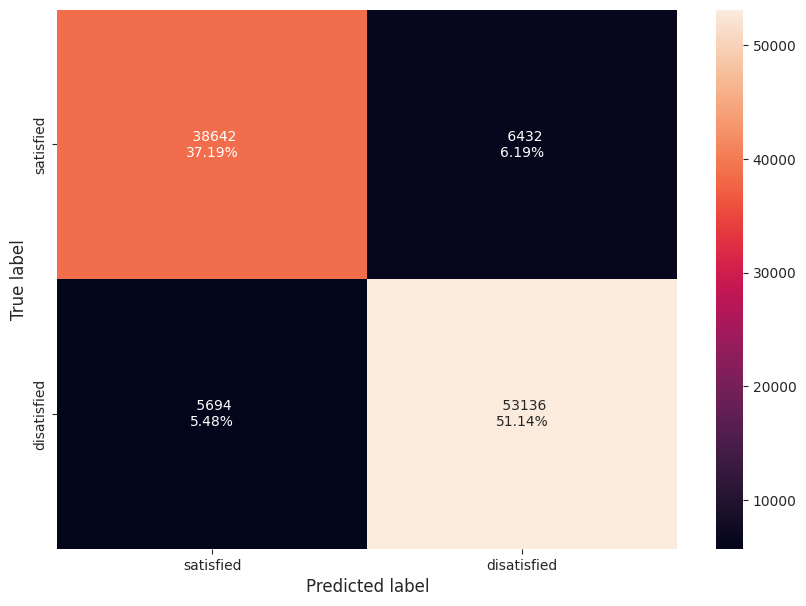

In [53]:
pred_train = logreg.predict(x_train)
make_confusion_matrix(y_train, pred_train)


# **observation**
the model has a higher accuracy for classifying satisfied patients than dissatisfied patients:  This can be seen from the fact that the value in the bottom right corner (37,192) is significantly higher than the value in the top left corner (5,694).

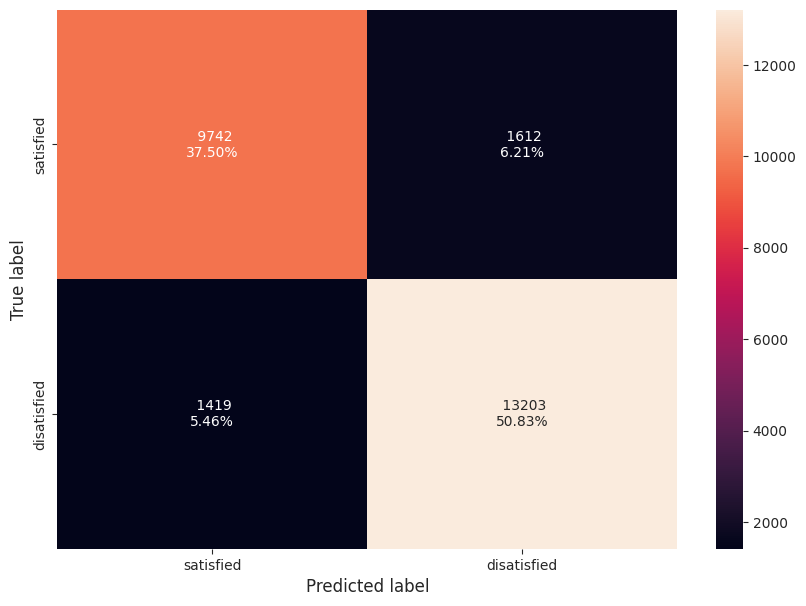

In [54]:
pred_test = logreg.predict(x_test)
make_confusion_matrix(y_test, pred_test)

# **observation**
Overall, the model seems to be biased towards predicting satisfaction:  This can be seen from the higher numbers in the right column (predicted label) compared to left column (predicted label).

In [55]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve



print('Accuracy on train data:', accuracy_score(y_train, pred_train) )
print('Accuracy on test data:', accuracy_score(y_test, pred_test))
print("\n")
print("Recall on train data:", recall_score(y_train, pred_train))
print("Recall on test data:", recall_score(y_test, pred_test))
print("\n")
print("Precision on train data:", precision_score(y_train, pred_train))
print("Precision on test data:", precision_score(y_test, pred_test))
print("\n")
print("f1 score on train data:", f1_score(y_train, pred_train))
print("f1 score on test data:", f1_score(y_test, pred_test))

Accuracy on train data: 0.8832961194949184
Accuracy on test data: 0.8833153680320296


Recall on train data: 0.8573013267071926
Recall on test data: 0.8580236040162057


Precision on train data: 0.8715716347888849
Precision on test data: 0.872860854762118


f1 score on train data: 0.8643775863997316
f1 score on test data: 0.865378636464579


# Plot ROC-AUC curve and see the results

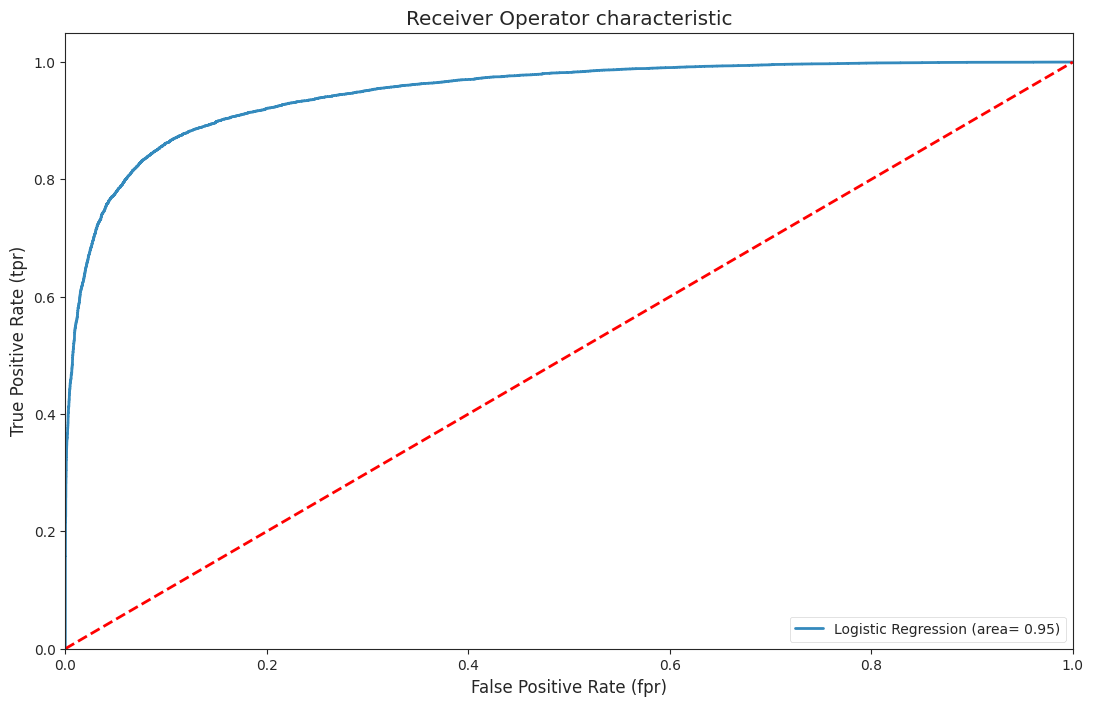

In [56]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict_proba(x_test)[:,1])
fpr, tpr, thresholds= roc_curve(y_test, logreg.predict_proba(x_test) [:,1])
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area= %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (fpr)')
plt.ylabel('True Positive Rate (tpr)')
plt.title('Receiver Operator characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# **Observation**

the logistic regression model performs well in classifying between positive and negative cases. This can be seen by the curve’s position in the upper left corner of the graph, closer to the ideal point (1, 1).
The area under the ROC curve (AUC) is 0.95, which is a good value. An AUC of 1 corresponds to a perfect classifier.

# Optimal Cutoff

In [57]:
train_pred_prob = logreg.predict_proba(x_train)[:,1]
train_pred_prob

array([0.20600256, 0.04359859, 0.23212618, ..., 0.88126305, 0.50112397,
       0.27174789])

In [58]:
column_names = ["Cutoff_Prob", "TP", "FN", "TN", "FP", "P", "N"]

cutoff_data = pd.DataFrame(columns=column_names)
Cutoff_Prob = np.arange(0, 1.01, 0.01)

for cutoff in Cutoff_Prob:
    y_train["pred_y"] = (train_pred_prob > cutoff).astype("int64")
    TP = np.logical_and((y_train.pred_y == 1), (y_train.satisfaction == 1)).sum()
    FN = np.logical_and((y_train.pred_y == 0), (y_train.satisfaction == 1)).sum()
    TN = np.logical_and((y_train.pred_y == 0), (y_train.satisfaction == 0)).sum()
    FP = np.logical_and((y_train.pred_y == 1), (y_train.satisfaction == 0)).sum()
    P = TP + FN
    N = TN + FP

    temp_data = {
        "Cutoff_Prob": cutoff,
        "TP": TP,
        "FN": FN,
        "TN": TN,
        "FP": FP,
        "P": P,
        "N": N
    }

    cutoff_data = cutoff_data.append(temp_data, ignore_index=True)

# Dropping the pred_y column from y_train data
y_train.drop("pred_y", axis=1, inplace=True)

We have got the basic cutoff data. Let us now get all the features needed to decide the cutoff.



In [59]:
cutoff_data['Sn']= cutoff_data["TP"]/cutoff_data["P"]
cutoff_data['Sp'] = cutoff_data["TN"]/cutoff_data["N"]
cutoff_data['Dist'] = ((1-cutoff_data["Sn"])**2 + (1-cutoff_data["Sp"])**2)** 0.5
cutoff_data['KS'] = ((cutoff_data["TP"]/cutoff_data["P"]) - (cutoff_data["FP"]/cutoff_data["N"])).abs()
cutoff_data['Re'] = cutoff_data["TP"]/cutoff_data["P"]
cutoff_data['Pr'] = cutoff_data["TP"]/(cutoff_data["TP"] + cutoff_data["FP"])
cutoff_data['tpr'] = cutoff_data["Re"]
cutoff_data['fpr'] =  1 - cutoff_data["Sp"]
cutoff_data['f1'] = 2 * (cutoff_data["Pr"] * cutoff_data["Re"])/(cutoff_data["Pr"] + cutoff_data["Re"])

In [60]:
cutoff_data.head()

Cutoff_Prob       TP     FN       TN       FP        P        N        Sn  \
0         0.00  45074.0    0.0      0.0  58830.0  45074.0  58830.0  1.000000   
1         0.01  44975.0   99.0  12917.0  45913.0  45074.0  58830.0  0.997804   
2         0.02  44821.0  253.0  19456.0  39374.0  45074.0  58830.0  0.994387   
3         0.03  44657.0  417.0  23594.0  35236.0  45074.0  58830.0  0.990749   
4         0.04  44491.0  583.0  26746.0  32084.0  45074.0  58830.0  0.987066   

         Sp      Dist        KS        Re        Pr       tpr       fpr  \
0  0.000000  1.000000  0.000000  1.000000  0.433804  1.000000  1.000000   
1  0.219565  0.780438  0.217368  0.997804  0.494840  0.997804  0.780435   
2  0.330716  0.669308  0.325103  0.994387  0.532348  0.994387  0.669284   
3  0.401054  0.599018  0.391802  0.990749  0.558960  0.990749  0.598946   
4  0.454632  0.545521  0.441698  0.987066  0.581012  0.987066  0.545368   

         f1  
0  0.605109  
1  0.661582  
2  0.693453  
3  0.714701  
4  0.731465

Let us now check for the results for accuracy using different cutoff methods.
Let us pick up max distance first

In [61]:
dist_cutoff = cutoff_data.loc[np.argmin(cutoff_data ["Dist"]), "Cutoff_Prob"]
ks_cutoff =  cutoff_data.loc[np.argmax(cutoff_data["KS"]), "Cutoff_Prob"]
f1_cutoff = cutoff_data.loc[np.argmax(cutoff_data["f1"]), "Cutoff_Prob"]

In [62]:
print ("The dist cutoff determined is:", dist_cutoff)
print ("The KS cutoff determined is:", ks_cutoff)
print ("The f1 cutoff determined is:", f1_cutoff)

The dist cutoff determined is: 0.45
The KS cutoff determined is: 0.47000000000000003
The f1 cutoff determined is: 0.47000000000000003


In [63]:
cutoffs = [dist_cutoff, ks_cutoff, f1_cutoff]

for cutoff in cutoffs:
  y_pred_train = (logreg.predict_proba(x_train)[:,1]> cutoff).astype(int)
  y_pred_test = (logreg.predict_proba(x_test)[:,1]> cutoff).astype(int)

print("Using the cutoff value as:", cutoff)
print('Accuracy on train data:', accuracy_score(y_train, y_pred_train))
print("Accuracy on test data:", accuracy_score(y_test, y_pred_test))
print("\n")
print("Recall on train data:", recall_score(y_train, y_pred_train))
print("Recall on test data:", recall_score(y_test, y_pred_test))
print("\n")
print("Precision on train data:", precision_score(y_train, y_pred_train))
print("Precision on test data:", precision_score(y_test, y_pred_test))
print("\n")
print("f1 score on train data:", f1_score(y_train, y_pred_train))
print("f1 score on test data:", f1_score(y_test, y_pred_test))
print("\n")

Using the cutoff value as: 0.47000000000000003
Accuracy on train data: 0.8822663227594703
Accuracy on test data: 0.8826609177702495


Recall on train data: 0.8674845809113901
Recall on test data: 0.8671833714990311


Precision on train data: 0.8619959877427746
Precision on test data: 0.8647461795187071


f1 score on train data: 0.8647315751644827
f1 score on test data: 0.8659630606860158




default = 0.5

In [64]:
cutoffs = [0.5, dist_cutoff, ks_cutoff, f1_cutoff]
results = []

for cutoff in cutoffs:
    y_pred_train = (logreg.predict_proba(x_train)[:, 1] > cutoff).astype(int)
    y_pred_test = (logreg.predict_proba(x_test)[:, 1] > cutoff).astype(int)

    result_dict = {
        "Cutoff": cutoff,
        'Accuracy_train': accuracy_score(y_train, y_pred_train),
        'Accuracy_test': accuracy_score(y_test, y_pred_test),
        'Recall_train': recall_score(y_train, y_pred_train),
        'Recall_test': recall_score(y_test, y_pred_test),
        'Precision_train': precision_score(y_train, y_pred_train),
        'Precision_test': precision_score(y_test, y_pred_test),
        'F1_train': f1_score(y_train, y_pred_train),
        'F1_test': f1_score(y_test, y_pred_test),
    }

    results.append(result_dict)

# Convert the list of dictionaries to a DataFrame
results0 = pd.DataFrame(results)

# Display the DataFrame
results0

Cutoff  Accuracy_train  Accuracy_test  Recall_train  Recall_test  \
0    0.50        0.883296       0.883315      0.857301     0.858024   
1    0.45        0.880948       0.881429      0.873630     0.872820   
2    0.47        0.882266       0.882661      0.867485     0.867183   
3    0.47        0.882266       0.882661      0.867485     0.867183   

   Precision_train  Precision_test  F1_train   F1_test  
0         0.871572        0.872861  0.864378  0.865379  
1         0.855077        0.858306  0.864254  0.865502  
2         0.861996        0.864746  0.864732  0.865963  
3         0.861996        0.864746  0.864732  0.865963

In [65]:
# Function to accuracy score

def get_accuracy_score(model):
  '''
  model: classifier to predict values of X

  '''

  pred_train = model.predict(x_train)  # Predict on training set
  pred_test = model.predict(x_test)  # Predict on test set

  print("accuracy on training set: ", metrics.accuracy_score(y_train, pred_train))
  print("accuracy on test set: ", metrics.accuracy_score(y_test, pred_test))


# Function to cal recall score

def get_recall_score(model):
  '''
  model: classifier to predict values of X

  '''

  pred_train = model.predict(x_train)  # Predict on training set
  pred_test = model.predict(x_test)  # Predict on test set

  print("Recall on training set: ", metrics.recall_score(y_train, pred_train))
  print("Recall on test set: ", metrics.recall_score(y_test, pred_test))



  # Function to call precision score

def get_precision_score(model):
  '''
  model: classifier to predict values of X

  '''

  pred_train = model.predict(x_train)  # Predict on training set
  pred_test = model.predict(x_test)  # Predict on test set

  print("precision on training set: ", metrics.precision_score(y_train, pred_train))
  print("precision on test set: ", metrics.precision_score(y_test, pred_test))





# Function to call f1 score

def get_f1_score(model):
  '''
  model: classifier to predict values of X

  '''

  pred_train = model.predict(x_train)  # Predict on training set
  pred_test = model.predict(x_test)  # Predict on test set

  print("f1_score on training set: ", metrics.f1_score(y_train, pred_train))
  print("f1_score on test set: ", metrics.f1_score(y_test, pred_test))



# <font color = "Brown" size = 8> **Decision Tree** </font>

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [67]:
model = DecisionTreeClassifier(criterion='gini',class_weight={0:0.43,1:0.57},random_state=1)

In [68]:
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.43, 1: 0.57}, random_state=1)

In [69]:
print(get_accuracy_score(model))
print(get_recall_score(model))
print( get_precision_score(model))
print( get_f1_score(model))


accuracy on training set:  1.0
accuracy on test set:  0.924853711117955
None
Recall on training set:  1.0
Recall on test set:  0.9166813457812225
None
precision on training set:  1.0
precision on test set:  0.9118626248466796
None
f1_score on training set:  1.0
f1_score on test set:  0.9142656359803233
None


we can see here that the model has overfit. we can reduce the overfitting by

 preprunning

 lets now see how the full grown tree looks

In [ ]:
feature_names = x.columns

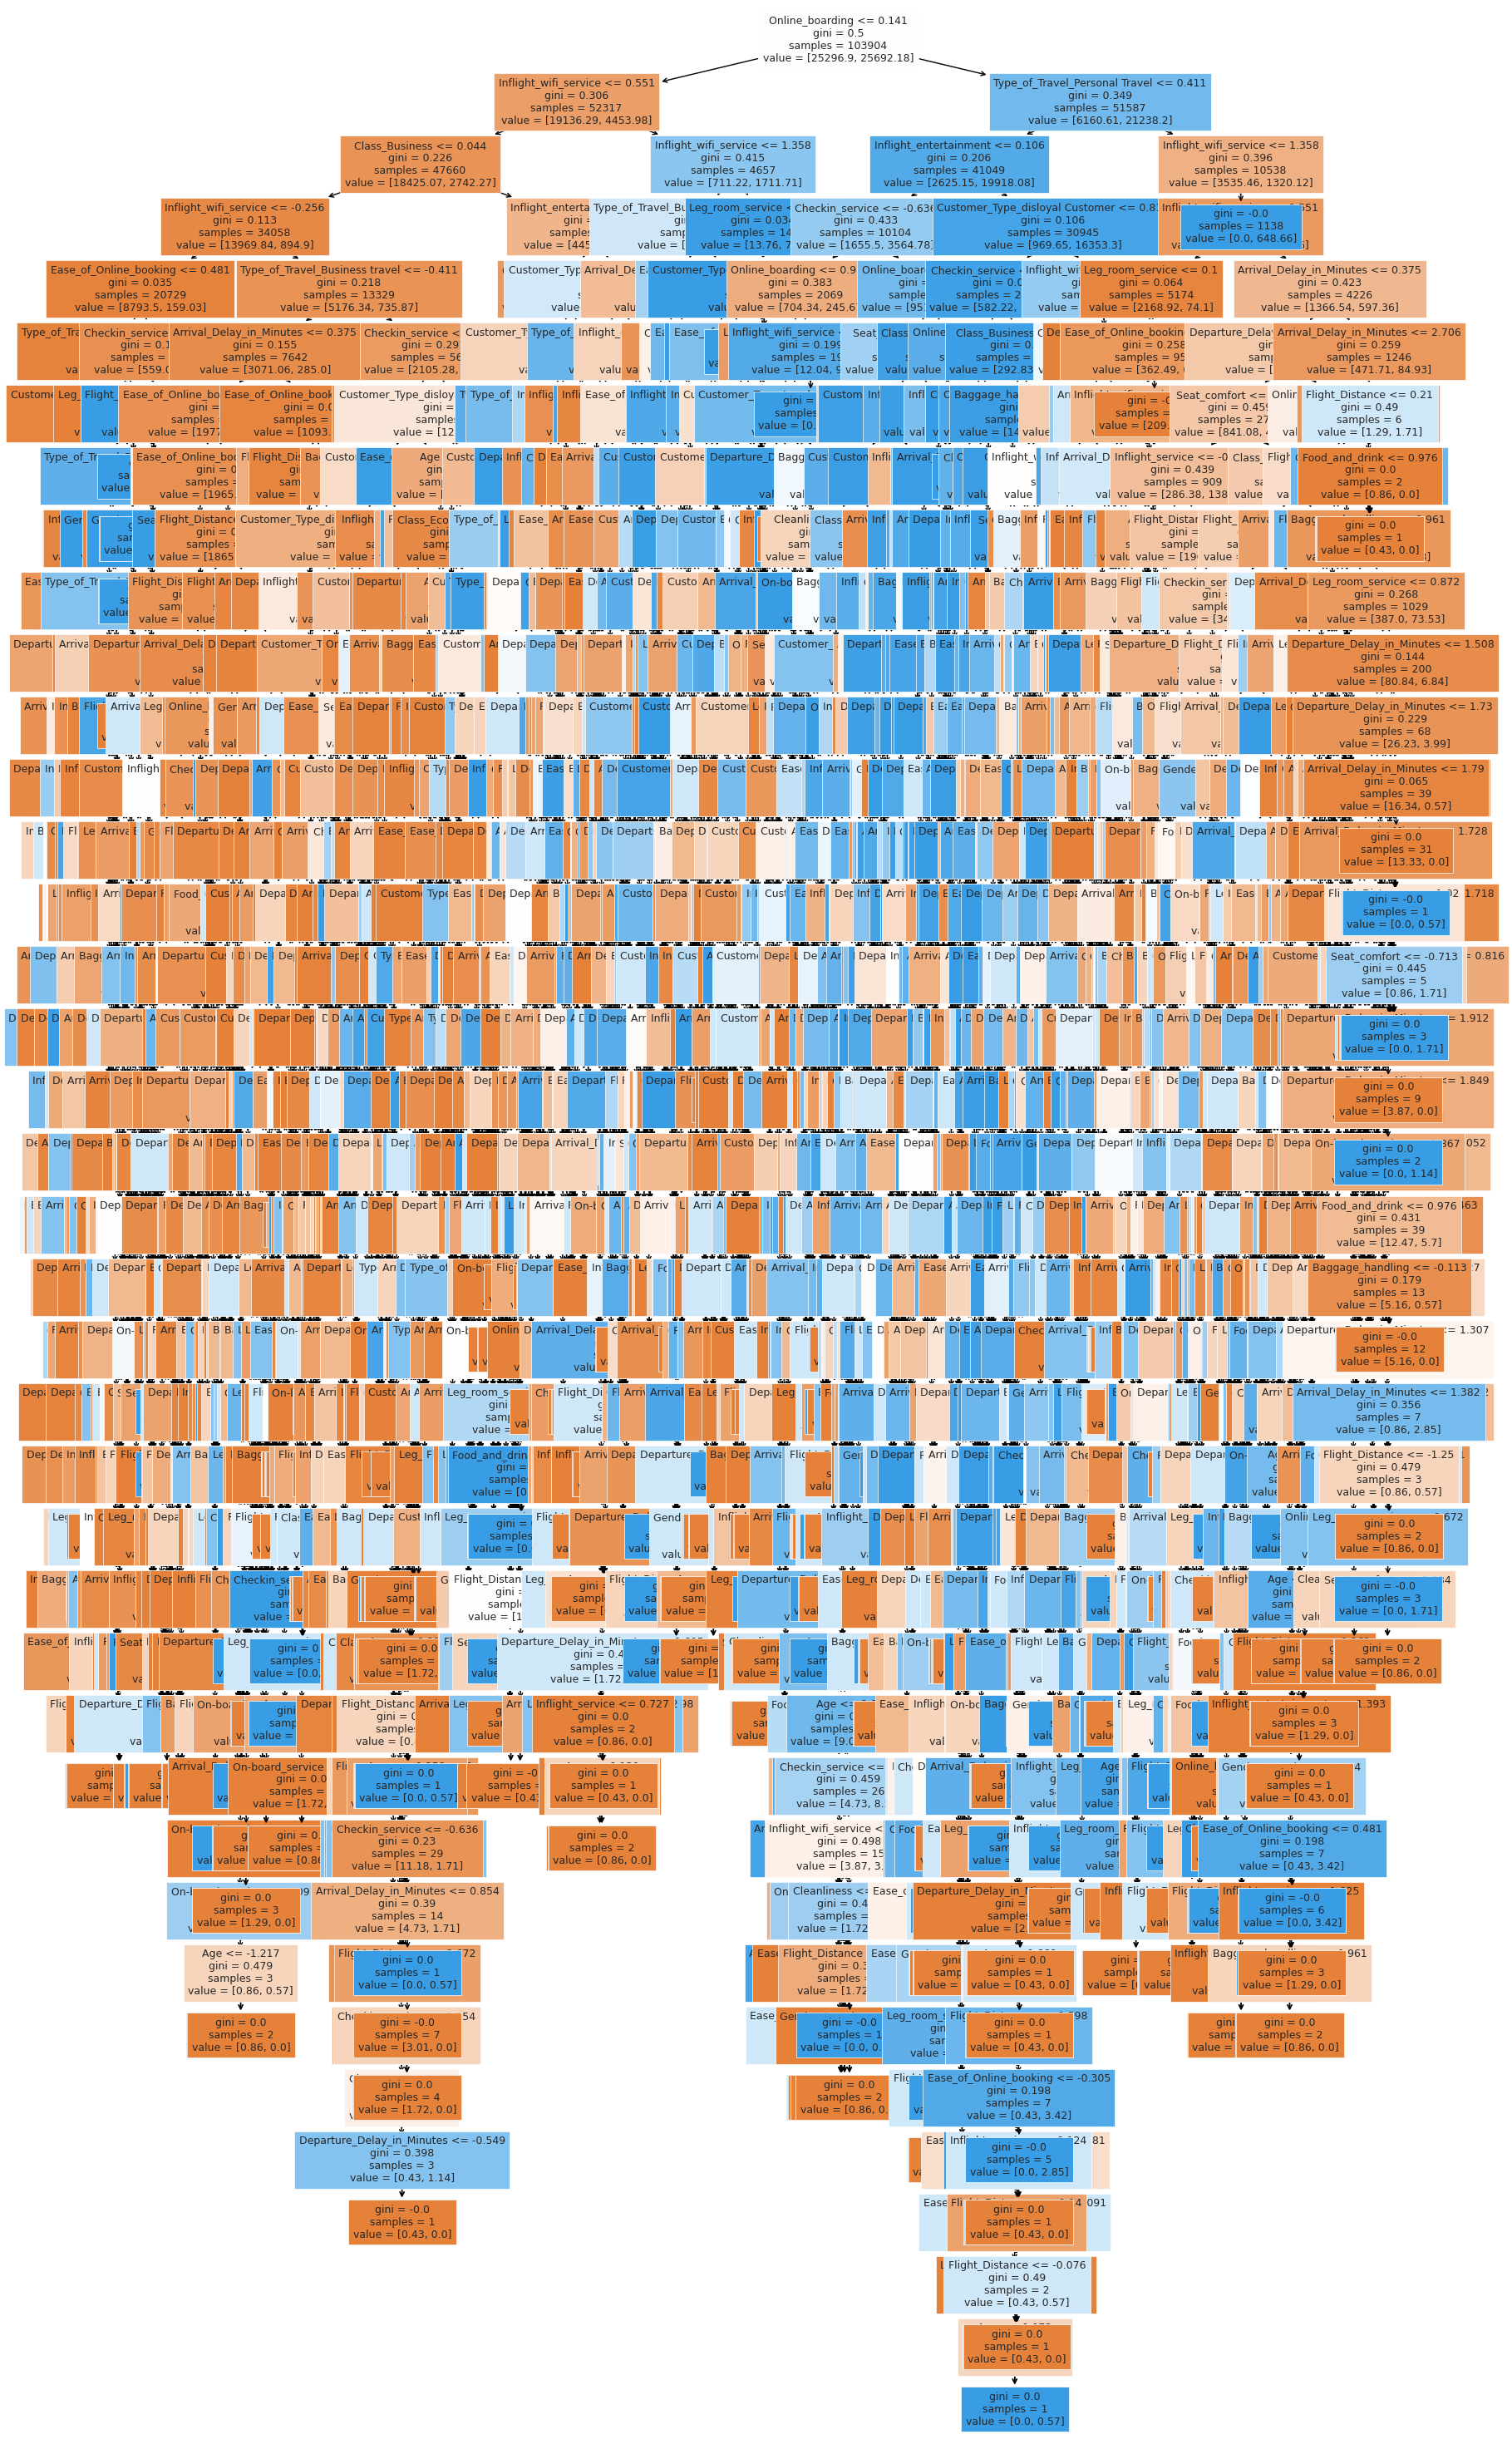

In [ ]:
plt.figure(figsize=(20,38))
out = tree.plot_tree(model,feature_names=feature_names, filled=True, fontsize=9, node_ids=False, class_names=None,)

#below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_linewidth(1)
        arrow.set_edgecolor('black')

plt.show()

# Pre-Pruning
Using pre-pruning method for hyper parameter tunning using Randomize search for better result

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0:0.43,1:0.57})

# Grid of parameters to choose from
parameters = {
    'max_depth': np.arange(1, 10),
    'criterion': ['entropy', 'gini'],
    'splitter': ['best', 'random'],
    'min_impurity_decrease': [0.000001, 0.00001, 0.0001],
    'max_features': ['log2', 'sqrt']
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

# Run the RandomizedSearchCV search
grid_obj = RandomizedSearchCV(estimator, parameters, scoring=scorer, cv=5, n_iter=50)
grid_obj = grid_obj.fit(x_train, y_train)

# find the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.43, 1: 0.57}, max_depth=9,
                       max_features='sqrt', min_impurity_decrease=0.0001,
                       random_state=1)

In [ ]:
print(get_accuracy_score(estimator))
print(get_recall_score(estimator))
print( get_precision_score(estimator))
print( get_f1_score(estimator))


accuracy on training set:  0.9080401139513397
accuracy on test set:  0.9072990452725593
None
Recall on training set:  0.8793761370191241
Recall on test set:  0.8801303505372556
None
precision on training set:  0.9058850417095189
precision on test set:  0.9051630434782608
None
f1_score on training set:  0.8924337772574271
f1_score on test set:  0.8924711976422256
None


<font color = "red" size = 8> **Random forest** </font>

In [70]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

In [71]:
print(get_accuracy_score(rf))
print(get_recall_score(rf))
print( get_precision_score(rf))
print( get_f1_score(rf))


accuracy on training set:  0.9999711271943332
accuracy on test set:  0.9518786572220511
None
Recall on training set:  0.9999334427829791
Recall on test set:  0.9157125242205391
None
precision on training set:  1.0
precision on test set:  0.9725912067352666
None
f1_score on training set:  0.9999667202839869
f1_score on test set:  0.9432952277263653
None


#**Observation**:

The model seems to be overfitting the training data. This is evident from the very high accuracy and recall on the training set (almost perfect scores) compared to the test set. While the test set accuracy and recall are still good, the significant drop suggests the model is memorizing the training data too well and might not generalize well to unseen data.

<font color = "Brown" size = 5> **Random Forest with Class Weight** </font>

In [72]:
rf_weight = RandomForestClassifier(class_weight={0:0.43,1:0.57},random_state=1)
rf_weight.fit(x_train,y_train)

RandomForestClassifier(class_weight={0: 0.43, 1: 0.57}, random_state=1)

In [73]:
print(get_accuracy_score(rf_weight))
print(get_recall_score(rf_weight))
print( get_precision_score(rf_weight))
print( get_f1_score(rf_weight))


accuracy on training set:  0.9999711271943332
accuracy on test set:  0.9521481367416076
None
Recall on training set:  0.9999334427829791
Recall on test set:  0.9157125242205391
None
precision on training set:  1.0
precision on test set:  0.9732284938687634
None
f1_score on training set:  0.9999667202839869
f1_score on test set:  0.943594863184644
None


#**Observation**:    

While using class weights in  Random Forest did not significantly improve the test set performance compared to the initial overfitted model,


<font color = "Red" size = 8> **Bagging Classifier** </font>

In [74]:
from sklearn.ensemble import BaggingClassifier

In [75]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(x_train,y_train)

BaggingClassifier(random_state=1)

In [76]:
print(get_accuracy_score(bagging))
print(get_recall_score(bagging))
print( get_precision_score(bagging))
print( get_f1_score(bagging))

accuracy on training set:  0.9951012473052048
accuracy on test set:  0.9478749615029258
None
Recall on training set:  0.9893730310156631
Recall on test set:  0.9118372379778051
None
precision on training set:  0.999327731092437
precision on test set:  0.9670278348589576
None
f1_score on training set:  0.9943254662816754
f1_score on test set:  0.9386219401631913
None


#**Observation**:

The model still exhibits signs of overfitting, but to a lesser extent compared to the initial Random Forest. This can be seen in the gap between training and test set metrics, although the difference is smaller than before. The model performs well but might not generalize perfectly to unseen data.


<font color = "Brown" size = 5> **Bagging Classifier with weighted Decision Tree** </font>

In [ ]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.43,1:0.57},random_state=1),random_state=1)
bagging_wt.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.43,
                                                                      1: 0.57},
                                                        random_state=1),
                  random_state=1)

In [ ]:
print(get_accuracy_score(bagging_wt))
print(get_recall_score(bagging_wt))
print( get_precision_score(bagging_wt))
print( get_f1_score(bagging_wt))

accuracy on training set:  0.995120495842316
accuracy on test set:  0.9467585463504774
None
Recall on training set:  0.9895505169277189
Recall on test set:  0.9082261757970759
None
precision on training set:  0.9991935303210198
precision on test set:  0.9679902374917864
None
f1_score on training set:  0.9943486451238951
f1_score on test set:  0.93715635934021
None


#**Observation**:    

The training and test set metrics (accuracy, recall, precision, F1-score) are very similar to the previous case with Bagging and unweighted trees. This indicates minimal overall change in performance.

Similar to the previous case, the model still exhibits signs of overfitting due to the gap between training and test set metrics. It might not generalize perfectly to unseen data.

# <font color = "Brown" size = 5> **Tunning Bagging Classifier** </font>

In [ ]:
# Create a base classifier (Decision Tree with class weights)
cl1 = DecisionTreeClassifier(class_weight={0:0.43,1:0.57}, random_state=1)

# Define the parameter grid for GridSearchCV
param_grid = {
    'base_estimator': [cl1],
    'n_estimators': [5, 7, 15, 51, 101],
    'max_features': [0.7, 0.8, 0.9, 1]
}

# Create the BaggingClassifier with default parameters (you can customize them if needed)
bagging_classifier = BaggingClassifier(random_state=1, bootstrap=True)

# Create the GridSearchCV object
grid = GridSearchCV(bagging_classifier, param_grid=param_grid, scoring='recall', cv=5)  # specify the number of folds for cross-validation

# Fit the GridSearchCV on the training data
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1),
             param_grid={'base_estimator': [DecisionTreeClassifier(class_weight={0: 0.43,
                                                                                 1: 0.57},
                                                                   random_state=1)],
                         'max_features': [0.7, 0.8, 0.9, 1],
                         'n_estimators': [5, 7, 15, 51, 101]},
             scoring='recall')

In [ ]:
# getting the best parameter
bagging_estimator = grid.best_estimator_
bagging_estimator.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.43,
                                                                      1: 0.57},
                                                        random_state=1),
                  max_features=0.9, n_estimators=15, random_state=1)

In [ ]:
print(get_accuracy_score(bagging_estimator))
print(get_recall_score(bagging_estimator))
print( get_precision_score(bagging_estimator))
print( get_f1_score(bagging_estimator))

accuracy on training set:  0.9985082383738836
accuracy on test set:  0.9505697566984909
None
Recall on training set:  0.9970492967120734
Recall on test set:  0.919499735775938
None
precision on training set:  0.9995107088050175
precision on test set:  0.96577243293247
None
f1_score on training set:  0.998278485511512
f1_score on test set:  0.9420682187330807
None


#**Observation**:             

While there are improvements, the gap between training and test set metrics remains significant. This indicates that the model still suffers from overfitting, although GridSearchCV might have helped partially address it.

<font color = "Red" size = 8> **Boosting Model** </font>

boosting models are often preferred when seeking improved predictive performance, robustness to overfitting, and interpretability of feature importance. If We are looking to enhance our model's accuracy and understand the importance of different features in our dataset, using a boosting algorithm could be a promising approach.

Lets try boosting models


 <font color = "Brown" size = 5> **AdaBoost** </font>

In [ ]:
from sklearn.ensemble import AdaBoostClassifier


# Choose the type of classifier.
ab_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(10, 100, 10),
              'learning_rate': [1, 0.1, 0.5, 0.01]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

# Run the randomized grid search
randomized_search_obj = RandomizedSearchCV(ab_tuned, parameters, scoring=scorer, cv=5, n_iter=10, random_state=42)
randomized_search_obj = randomized_search_obj.fit(x_train, y_train)

# Find the best combination of parameters
ab_tuned_randomized = randomized_search_obj.best_estimator_

In [ ]:
print(get_accuracy_score(ab_tuned_randomized))
print(get_recall_score(ab_tuned_randomized))
print( get_precision_score(ab_tuned_randomized))
print( get_f1_score(ab_tuned_randomized))

accuracy on training set:  0.9072990452725593
accuracy on test set:  0.9062211271943332
None
Recall on training set:  0.8790655366730266
Recall on test set:  0.8761669896071869
None
precision on training set:  0.904552095699023
precision on test set:  0.906175988340317
None
f1_score on training set:  0.8916267242737236
f1_score on test set:  0.890918860827512
None


#**Observation**:

While AdaBoost avoids the severe overfitting seen with Random Forest and Bagging Classifier, it still struggles with generalizability to some extent.

 <font color = "Brown" size = 5> **Gradiant boost** </font>


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


gd_estimator =GradientBoostingClassifier(random_state=1)
gd_estimator.fit(x_train,y_train)

GradientBoostingClassifier(random_state=1)

In [ ]:
print(get_accuracy_score(gd_estimator))
print(get_recall_score(gd_estimator))
print( get_precision_score(gd_estimator))
print( get_f1_score(gd_estimator))

accuracy on training set:  0.9304261626116415
accuracy on test set:  0.9299353249153064
None
Recall on training set:  0.8934862670275547
Recall on test set:  0.89307732957548
None
precision on training set:  0.943139504929627
precision on test set:  0.943606923506421
None
f1_score on training set:  0.9176416975220736
f1_score on test set:  0.9176470588235295
None


#**Observation**:       

Gradient boosting models exhibit minimal overfitting, evident from the very close training and test set accuracies (around 0.93) and similar recall and precision values on both sets. This suggests good generalizability to unseen data.

In [ ]:
gb_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50, 200, 25),
              'subsample': [0.7, 0.8, 0.9],
              'max_features': [0.7, 0.8, 0.9],
              'max_depth': [3, 5, 7, 10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

# Run the randomized grid search
randomized_search_obj = RandomizedSearchCV(gb_tuned, parameters, scoring=scorer, cv=5, n_iter=10, random_state=2)
randomized_search_obj = randomized_search_obj.fit(x_train, y_train)

# find the best combination of parameters
gb_tuned_randomized = randomized_search_obj.best_estimator_


In [ ]:
print(get_accuracy_score(gb_tuned_randomized))
print(get_recall_score(gb_tuned_randomized))
print( get_precision_score(gb_tuned_randomized))
print( get_f1_score(gb_tuned_randomized))

accuracy on training set:  0.9768151370495842
accuracy on test set:  0.953688019710502
None
Recall on training set:  0.956515951546346
Recall on test set:  0.9192355117139334
None
precision on training set:  0.9896930881711544
precision on test set:  0.973328359600858
None
f1_score on training set:  0.9728217335875537
f1_score on test set:  0.9455089006658512
None


#**Observation**:    

Accuracy: The test set accuracy (0.954) is higher than the previous model (0.93), showing a good ability to correctly predict outcomes on unseen data.

Recall and Precision: Both metrics have significantly improved on the test set, suggesting better performance in identifying true positives and reducing false positives compared to the previous model.

F1-score: The F1-score has also improved on the test set, reflecting a better balance between precision and recall.

 <font color = "Brown" size = 5> **XG boost** </font>

In [77]:
from xgboost import XGBClassifier

In [78]:
xgb_estimator=XGBClassifier(random_state = 1)
xgb_estimator.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [79]:
print(get_accuracy_score(xgb_estimator))
print(get_recall_score(xgb_estimator))
print( get_precision_score(xgb_estimator))
print( get_f1_score(xgb_estimator))

accuracy on training set:  0.9639667385278718
accuracy on test set:  0.9521481367416076
None
Recall on training set:  0.9338864977592404
Recall on test set:  0.9166813457812225
None
precision on training set:  0.9821736898595361
precision on test set:  0.9722559551611396
None
f1_score on training set:  0.9574216439976346
f1_score on test set:  0.9436511174577271
None


#**Observation**:    
While the training and test set accuracies are similar (around 0.95), recall and precision are slightly lower on the test set. This indicates that the model might memorize the training data too well and struggle to generalize to unseen data to some extent.

In [82]:
xgb_tuned = XGBClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    'n_estimators': [100, 150],
    'subsample': [0.8, 0.9, 1.0],
    'gamma':  [0.1, 0.5, 1.0,2,3],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'colsample_bylevel': [0.8, 0.9, 1.0],
    'colsample_by_node': [0.8, 0.9, 1.0],
    'learning_rate': [0.01, 0.05, 0.1],
    'scale_pos_weight': [1, 5, 10],
    'max_depth': [3, 4, 5]  # Added max_depth
    #'min_child_weight': [1, 2, 3]  # Added min_child_weight
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

# Run the randomized grid search
randomized_search_obj = RandomizedSearchCV(xgb_tuned, parameters, scoring=scorer, cv=5, n_iter=10, random_state=42)
randomized_search_obj = randomized_search_obj.fit(x_train, y_train)

# find the best combination of parameters
xgb_tuned_randomized = randomized_search_obj.best_estimator_

In [83]:
print(get_accuracy_score(xgb_tuned_randomized))
print(get_recall_score(xgb_tuned_randomized))
print( get_precision_score(xgb_tuned_randomized))
print( get_f1_score(xgb_tuned_randomized))

accuracy on training set:  0.9339005235602095
accuracy on test set:  0.9332845703726517
None
Recall on training set:  0.8938190531126592
Recall on test set:  0.8925488814514708
None
precision on training set:  0.9508614585791834
precision on test set:  0.9518174133558749
None
f1_score on training set:  0.9214583047436072
f1_score on test set:  0.921230853143039
None


#**Observation**:    

Accuracy: The test set accuracy (0.93) is slightly higher than the previous case (0.95), but still suggests a good ability to correctly predict outcomes on unseen data.

Recall and Precision: Both metrics show minor improvements on the test set, indicating slightly better performance in identifying true positives and reducing false positives compared to the previous model.

F1-score: The F1-score remains similar on the test set, reflecting a maintained balance between precision and recall.




Compared to XGBoost without hyperparameter tuning (previous response), the gap between training and test set metrics has narrowed considerably. This indicates less overfitting, suggesting the tuning process identified hyperparameter values that improve generalizability.

In [84]:
# importance of features in the XG boost

# Assuming xgb_tuned_randomized is the correct model
importance_df = pd.DataFrame(xgb_tuned_randomized.feature_importances_, columns=["Imp"], index=x_train.columns)
sorted_importance = importance_df.sort_values(by="Imp", ascending=False)

print(sorted_importance)

                                      Imp
Online_boarding                  0.216603
Class_Business                   0.158658
Type_of_Travel_Business travel   0.069914
Inflight_entertainment           0.061969
Type_of_Travel_Personal Travel   0.058890
Inflight_wifi_service            0.058760
Class_Eco                        0.057269
Customer_Type_disloyal Customer  0.042320
Checkin_service                  0.037749
Seat_comfort                     0.034763
Customer_Type_Loyal Customer     0.034364
Leg_room_service                 0.028377
On-board_service                 0.026062
Baggage_handling                 0.024692
Cleanliness                      0.020462
Inflight_service                 0.019564
Ease_of_Online_booking           0.011900
Age                              0.011581
Arrival_Delay_in_Minutes         0.010899
Flight_Distance                  0.005842
Gender_Female                    0.003940
Departure_Delay_in_Minutes       0.002678
Food_and_drink                   0

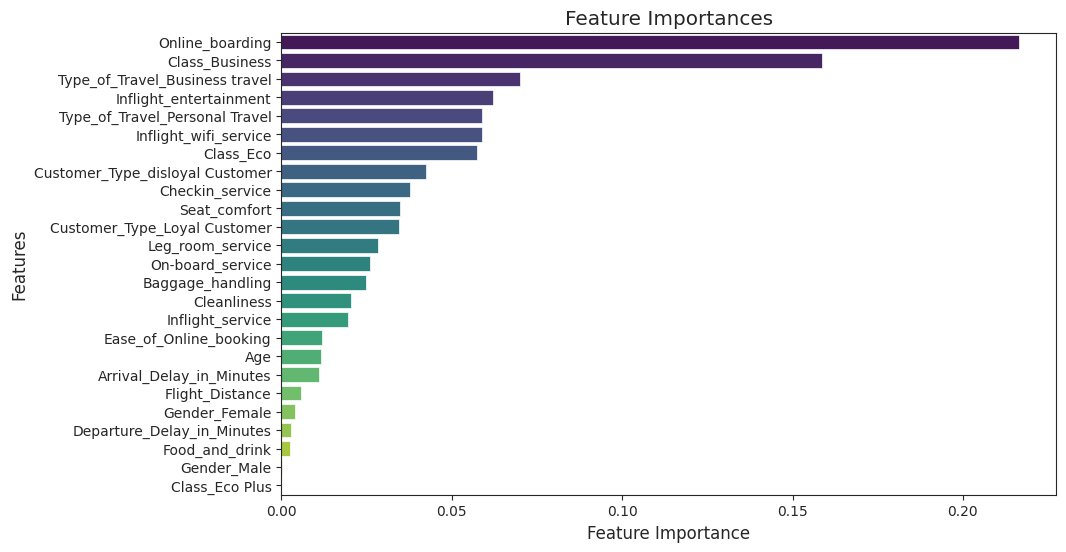

In [86]:

importance_df = pd.DataFrame(xgb_tuned_randomized.feature_importances_, columns=["Imp"], index=x_train.columns)
sorted_importance = importance_df.sort_values(by="Imp", ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importance["Imp"], y=sorted_importance.index, palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances")
plt.show()


# **Observation**

 The most important factor is the type of travel (business or personal), followed by the class (economy, business, or economy plus). The least important factors are age, gender, and arrival delay in minutes.

In [ ]:
comparison_frame = pd.DataFrame({'Model': ['Initial decision tree model', 'Preprunning ','AdaBoost', 'GradientBoost','XGBoost'],
                                 'Train_Acuuracy' : [1,90,90.7,97.6,93.3],'Test_accuracy' : [92,90,90.6,95.3,93.4],
                                 'Train_Recall': [1,87,87.9,95.6,89.3], 'Test_Recall': [91,88,87.6,91.9,89.2],
                                 'Train_Precision':[1,90,90.4,98.9,95],'Test_Precision':[91,91,90.6,97.3,95.1],
                                 'Train_F1_score':[1,89,89.1,97.2,92.1],'Test_F1_score':[91,89,89,94.5,92.1]})
comparison_frame

Model  Train_Acuuracy  Test_accuracy  Train_Recall  \
0  Initial decision tree model             1.0           92.0           1.0   
1                 Preprunning             90.0           90.0          87.0   
2                     AdaBoost            90.7           90.6          87.9   
3                GradientBoost            97.6           95.3          95.6   
4                      XGBoost            93.3           93.4          89.3   

   Test_Recall  Train_Precision  Test_Precision  Train_F1_score  Test_F1_score  
0         91.0              1.0            91.0             1.0           91.0  
1         88.0             90.0            91.0            89.0           89.0  
2         87.6             90.4            90.6            89.1           89.0  
3         91.9             98.9            97.3            97.2           94.5  
4         89.2             95.0            95.1            92.1           92.1

# **observation**

Overall, based on the  information in this table, XGBoost appears to be a well-performing model for this task. It achieves high accuracy, precision, and recall on the test data, suggesting that it generalizes well and can be effective for making predictions.

Compared to other models in the table (Initial decision tree, Preprunning, AdaBoost, GradientBoost), XGBoost achieves the second-highest test accuracy and precision, and the third-highest test recall.

# **Conclusion:**

The Flight Satisfaction Prediction project aims to make air travel better for passengers by using data to understand what makes them happy during flights. Through analyzing various factors like age, travel preferences, and service ratings, the project uncovered insights to help airlines improve their services.

Key Takeaways:

1. **Understanding Passenger Needs**: By looking at data, we found out what aspects of flying matter most to passengers, such as comfort, entertainment, and online booking convenience.

2. **Predicting Satisfaction**: Using machine learning, we built models that can predict whether passengers will be happy with their flights. This helps airlines anticipate issues and make improvements before problems arise.

3. **Practical Recommendations**: Based on our findings, we suggest airlines focus on improving comfort, entertainment options, and online services to boost passenger satisfaction. Investing in technology and targeted marketing can also help build loyalty and keep customers coming back.

In short, by paying attention to what passengers want and using data-driven insights, airlines can create better experiences and keep customers happy in the sky.